In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Change Over Time_Corporate Ownership & Owner Occupancy Rates in Boston Neighborhoods.csv')
df = df.drop('own_occ_rate', axis=1)

extrapolated_data = []
for neighborhood in df['Neighborhood'].unique():
    neighborhood_data = df[df['Neighborhood'] == neighborhood]

    # Transform 'corp_own_rate' with the natural logarithm for the exponential model
    X = neighborhood_data[['Year']]
    y = np.log(neighborhood_data['corp_own_rate'])

    model = LinearRegression()
    model.fit(X, y)

    # Predict the ownership rates for the desired years
    target_years = np.array([[2003], [2002], [2001], [2000]])
    log_predicted_values = model.predict(target_years)

    # Transform the predicted values back to the original scale
    predicted_values = np.exp(log_predicted_values)

    for year, value in zip(target_years.flatten(), predicted_values):
        extrapolated_data.append({
            'Year': year,
            'Neighborhood': neighborhood,
            'corp_own_rate': value
        })

extrapolated_df = pd.DataFrame(extrapolated_data)
extrapolated_df = pd.concat([df, extrapolated_df], ignore_index=True)
extrapolated_df

/Users/angelyang/.julia/conda/3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/angelyang/.julia/conda/3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/angelyang/.julia/conda/3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/angelyang/.julia/conda/3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/angelyang/.julia/conda/3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/User

Neighborhood  Year  corp_own_rate
0         Allston  2004       0.070000
1         Allston  2005       0.070000
2         Allston  2006       0.080000
3         Allston  2007       0.080000
4         Allston  2008       0.090000
..            ...   ...            ...
520      West End  2000       0.034970
521  West Roxbury  2003       0.009384
522  West Roxbury  2002       0.008376
523  West Roxbury  2001       0.007476
524  West Roxbury  2000       0.006672

[525 rows x 3 columns]

In [3]:
full_census_data = pd.read_csv('Boston_Neighborhood_Census_Data (2000, 2010, 2015, 2017, 2020).csv')
full_census_data.head()

Neighborhood  Year  Population  0-9 years  10-19 years  20-34 years  \
0      Allston  2000       19075      924.0       2907.0      11647.0   
1     Back Bay  2000       16681      491.0       1380.0       7653.0   
2  Beacon Hill  2000        9051      378.0        276.0       4288.0   
3     Brighton  2000       50573     3051.0       2834.0      26560.0   
4  Charlestown  2000       15195     1661.0       1413.0       5043.0   

   35-54 years  55-64 years  65 years and over  less than High School  ...  \
0       2422.0        566.0              609.0                 1603.0  ...   
1       4243.0       1432.0             1482.0                  337.0  ...   
2       2375.0        921.0              814.0                  226.0  ...   
3       9531.0       2657.0             5940.0                 4180.0  ...   
4       4217.0       1218.0             1643.0                 1466.0  ...   

     White  Black/ African American  Hispanic  Asian/PI  Other  \
0  11253.0                      973      2545      3397    907   
1  13870.0                      614       730      1101    366   
2   7904.0                      288       295       442    122   
3  36582.0                     2137      3791      6214   1849   
4  11946.0                      539      1764       761    185   

   Male (Labor Force 16+)  Female (Labor Force 16+)  Occupied Housing Units  \
0                  5790.0                    5480.0                    7292   
1                  6662.0                    5433.0                   10053   
2                  3230.0                    3170.0                    5673   
3                 15722.0                   15670.0                   23213   
4                  4119.0                    4612.0                    7350   

   Owner-occupied  Renter-occupied  
0           709.0           6583.0  
1          3097.0           6956.0  
2          1773.0           3899.0  
3          5271.0          17942.0  
4          3039.0           4311.0  

[5 rows x 24 columns]

In [4]:

census_20 =  full_census_data[full_census_data['Year'] == 2020]
census_17 =  full_census_data[full_census_data['Year'] == 2017]
census_15 =  full_census_data[full_census_data['Year'] == 2015]
census_10 =  full_census_data[full_census_data['Year'] == 2010]
census_00 =  full_census_data[full_census_data['Year'] == 2000]
common_columns = set(census_20.columns) & set(census_17.columns) & set(census_15.columns) & set(census_10.columns) & set(census_00.columns)
common_neighborhoods = set(census_20['Neighborhood'].unique()) & set(census_17['Neighborhood'].unique()) & set(census_15['Neighborhood'].unique()) & set(census_10['Neighborhood'].unique()) & set(census_00['Neighborhood'].unique())
common_neighborhoods

{'Allston',
 'Brighton',
 'Charlestown',
 'Dorchester',
 'Downtown',
 'East Boston',
 'Fenway',
 'Hyde Park',
 'Jamaica Plain',
 'Longwood',
 'Mattapan',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South Boston Waterfront',
 'West Roxbury'}

In [5]:
common_columns

{'0-9 years',
 '10-19 years',
 '20-34 years',
 '35-54 years',
 '55-64 years',
 '65 years and over',
 'Asian/PI',
 "Bachelor's Degree or Higher",
 'Black/ African American',
 'Female (Labor Force 16+)',
 'Foreign Born',
 'High School or GED',
 'Hispanic',
 'Male (Labor Force 16+)',
 'Neighborhood',
 'Occupied Housing Units',
 'Other',
 'Owner-occupied',
 'Population',
 'Renter-occupied',
 "Some College or Associate's Degree",
 'White',
 'Year',
 'less than High School'}

In [6]:
census_years = [2020, 2017, 2015, 2010, 2000]
filtered_df = extrapolated_df[extrapolated_df['Year'].isin(census_years)]
filtered_df = filtered_df[filtered_df['Neighborhood'].isin(common_neighborhoods)]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

Neighborhood  Year  corp_own_rate
0                   Allston  2010       0.090000
1                   Allston  2015       0.130000
2                   Allston  2017       0.160000
3                   Allston  2020       0.220000
4                  Brighton  2010       0.070000
..                      ...   ...            ...
70               Roslindale  2000       0.008905
71                  Roxbury  2000       0.050151
72             South Boston  2000       0.031306
73  South Boston Waterfront  2000       0.063243
74             West Roxbury  2000       0.006672

[75 rows x 3 columns]

In [7]:
for neighborhood in common_neighborhoods:
    for year in census_years:
        census_dict = {2000: census_00, 2010: census_10, 2015: census_15, 2017: census_17, 2020: census_20}
        ref = census_dict.get(year)
        for column in common_columns:
            if column not in filtered_df.columns:
                filtered_df[column] = pd.NA
            
            val = ref.loc[ref['Neighborhood'] == neighborhood, column].values[0]
            filtered_df.loc[(filtered_df['Neighborhood'] == neighborhood) & (filtered_df['Year'] == year), column] = val
filtered_df

Neighborhood  Year  corp_own_rate 65 years and over  \
0                   Allston  2010       0.090000             624.0   
1                   Allston  2015       0.130000             652.0   
2                   Allston  2017       0.160000               NaN   
3                   Allston  2020       0.220000               NaN   
4                  Brighton  2010       0.070000            5374.0   
..                      ...   ...            ...               ...   
70               Roslindale  2000       0.008905            3908.0   
71                  Roxbury  2000       0.050151            3811.0   
72             South Boston  2000       0.031306            3865.0   
73  South Boston Waterfront  2000       0.063243             139.0   
74             West Roxbury  2000       0.006672            5791.0   

   less than High School Male (Labor Force 16+)    White Foreign Born  \
0                    NaN                    NaN  12808.0          NaN   
1                  715.0                    NaN  10494.0       6809.0   
2                  571.0                    NaN   9839.0       1873.0   
3                    NaN                    NaN  12536.0          NaN   
4                    NaN                    NaN  36761.0          NaN   
..                   ...                    ...      ...          ...   
70                3523.0                 7028.0  17041.0       7092.0   
71                7889.0                 7705.0   2244.0       8574.0   
72                3948.0                 7514.0  24082.0       3548.0   
73                 153.0                  508.0   1234.0        169.0   
74                2713.0                 7366.0  24029.0       4929.0   

   Owner-occupied 55-64 years  ... Hispanic 0-9 years Renter-occupied  \
0           810.0       768.0  ...     2799     763.0          6828.0   
1           631.0       675.0  ...     2674     550.0          5826.0   
2           796.0         NaN  ...     2586     409.0          5730.0   
3             NaN         NaN  ...     3259       NaN             NaN   
4          5625.0      3207.0  ...     4641    2668.0         17347.0   
..            ...         ...  ...      ...       ...             ...   
70         5429.0      1988.0  ...     4971    3562.0          5163.0   
71         3069.0      3029.0  ...     9979    7050.0         12371.0   
72         4441.0      2297.0  ...     2199    3026.0          8882.0   
73          301.0        96.0  ...       36      82.0           406.0   
74         7749.0      2584.0  ...     1309    3531.0          4334.0   

   Asian/PI Population Black/ African American Other 10-19 years  \
0      4510      22312                    1075  1120      3384.0   
1      4200      19363                    1194   801      2691.0   
2      4811      19261                    1099   926      2690.0   
3      6271      24904                    1326  1512         NaN   
4      7058      52685                    2356  1869      3168.0   
..      ...        ...                     ...   ...         ...   
70      643      27999                    4287  1057      3460.0   
71      370      42515                   26383  3539      7254.0   
72     1086      28537                     719   451      2737.0   
73       75       1401                      22    34       102.0   
74     1090      28753                    1718   607      2542.0   

   Female (Labor Force 16+) Occupied Housing Units  
0                       NaN                   7638  
1                       NaN                   6457  
2                       NaN                   6526  
3                       NaN                  10027  
4                       NaN                  22972  
..                      ...                    ...  
70                   7512.0                  10592  
71                   8958.0                  15440  
72                   7632.0                  13323  
73                    383.0                    707  
74                  

In [8]:
for column in common_columns:
    if column == 'Neighborhood' or column == 'Year' or column == 'corp_own_rate' or column == 'Population' or column == 'Occupied Housing Units': continue
    filtered_df[column] = filtered_df[column] / filtered_df['Population']
filtered_df

Neighborhood  Year  corp_own_rate 65 years and over  \
0                   Allston  2010       0.090000          0.027967   
1                   Allston  2015       0.130000          0.033672   
2                   Allston  2017       0.160000               NaN   
3                   Allston  2020       0.220000               NaN   
4                  Brighton  2010       0.070000          0.102002   
..                      ...   ...            ...               ...   
70               Roslindale  2000       0.008905          0.139576   
71                  Roxbury  2000       0.050151          0.089639   
72             South Boston  2000       0.031306          0.135438   
73  South Boston Waterfront  2000       0.063243          0.099215   
74             West Roxbury  2000       0.006672          0.201405   

   less than High School Male (Labor Force 16+)     White Foreign Born  \
0                    NaN                    NaN  0.574041          NaN   
1               0.036926                    NaN  0.541961      0.35165   
2               0.029645                    NaN  0.510825     0.097243   
3                    NaN                    NaN  0.503373          NaN   
4                    NaN                    NaN  0.697751          NaN   
..                   ...                    ...       ...          ...   
70              0.125826               0.251009  0.608629     0.253295   
71              0.185558                0.18123  0.052781      0.20167   
72              0.138347               0.263307  0.843887      0.12433   
73              0.109208               0.362598  0.880799     0.120628   
74              0.094355               0.256182  0.835704     0.171426   

   Owner-occupied 55-64 years  ...  Hispanic 0-9 years Renter-occupied  \
0        0.036303    0.034421  ...  0.125448  0.034197        0.306024   
1        0.032588     0.03486  ...  0.138098  0.028405        0.300883   
2        0.041327         NaN  ...  0.134261  0.021235        0.297492   
3             NaN         NaN  ...  0.130863       NaN             NaN   
4        0.106767    0.060871  ...   0.08809  0.050641        0.329259   
..            ...         ...  ...       ...       ...             ...   
70         0.1939    0.071003  ...  0.177542  0.127219        0.184399   
71       0.072186    0.071245  ...  0.234717  0.165824         0.29098   
72       0.155623    0.080492  ...  0.077058  0.106038        0.311245   
73       0.214847    0.068522  ...  0.025696   0.05853        0.289793   
74       0.269502    0.089869  ...  0.045526  0.122805        0.150732   

    Asian/PI Population Black/ African American     Other 10-19 years  \
0   0.202133      22312                 0.04818  0.050197    0.151667   
1   0.216909      19363                0.061664  0.041368    0.138976   
2   0.249779      19261                0.057058  0.048076     0.13966   
3   0.251807      24904                0.053244  0.060713         NaN   
4   0.133966      52685                0.044719  0.035475    0.060131   
..       ...        ...                     ...       ...         ...   
70  0.022965      27999                0.153113  0.037751    0.123576   
71  0.008703      42515                0.620557  0.083241    0.170622   
72  0.038056      28537                0.025195  0.015804    0.095911   
73  0.053533       1401                0.015703  0.024268    0.072805   
74  0.037909      28753                 0.05975  0.021111    0.088408   

   Female (Labor Force 16+) Occupied Housing Units  
0                       NaN                   7638  
1                       NaN                   6457  
2                       NaN                   6526  
3                       NaN                  10027  
4                       NaN                  22972  
..                      ...                    ...  
70                 0.268295                  10592  
71                 0.210702                  15440  
72                 0.267442               

In [9]:
filtered_df[filtered_df['Neighborhood'] == 'Allston']

Neighborhood  Year  corp_own_rate 65 years and over less than High School  \
0       Allston  2010       0.090000          0.027967                   NaN   
1       Allston  2015       0.130000          0.033672              0.036926   
2       Allston  2017       0.160000               NaN              0.029645   
3       Allston  2020       0.220000               NaN                   NaN   
60      Allston  2000       0.046145          0.031927              0.084037   

   Male (Labor Force 16+)     White Foreign Born Owner-occupied 55-64 years  \
0                     NaN  0.574041          NaN       0.036303    0.034421   
1                     NaN  0.541961      0.35165       0.032588     0.03486   
2                     NaN  0.510825     0.097243       0.041327         NaN   
3                     NaN  0.503373          NaN            NaN         NaN   
60               0.303539  0.589934     0.338506       0.037169    0.029672   

    ...  Hispanic 0-9 years Renter-occupied  Asian/PI Population  \
0   ...  0.125448  0.034197        0.306024  0.202133      22312   
1   ...  0.138098  0.028405        0.300883  0.216909      19363   
2   ...  0.134261  0.021235        0.297492  0.249779      19261   
3   ...  0.130863       NaN             NaN  0.251807      24904   
60  ...  0.133421   0.04844        0.345111  0.178087      19075   

   Black/ African American     Other 10-19 years Female (Labor Force 16+)  \
0                  0.04818  0.050197    0.151667                      NaN   
1                 0.061664  0.041368    0.138976                      NaN   
2                 0.057058  0.048076     0.13966                      NaN   
3                 0.053244  0.060713         NaN                      NaN   
60                0.051009  0.047549    0.152398                 0.287287   

   Occupied Housing Units  
0                    7638  
1                    6457  
2                    6526  
3                   10027  
60                   7292  

[5 rows x 25 columns]

In [10]:
# def calculate_correlations(group):
#     group = group.drop(['Neighborhood', 'Year'], axis=1)
#     correlations = group.corrwith(group['corp_own_rate']).drop('corp_own_rate')
#     return correlations

# correlation_df = filtered_df.groupby('Neighborhood').apply(calculate_correlations).unstack()
# print(correlation_df.head())

# Load the Excel file
file_path = 'correlations.xlsx'
correlation_df = pd.read_excel(file_path)

# Fill missing category names to ensure continuity
correlation_df['Unnamed: 0'].fillna(method='ffill', inplace=True)

# Rename columns for clarity
correlation_df.columns = ['Category', 'Neighborhood', 'Correlation']

# Set multi-level index using 'Category' and 'Neighborhood'
correlation_df.set_index(['Category', 'Neighborhood'], inplace=True)

# The DataFrame is now ready and structured
print(correlation_df.head())


                                 Correlation
Category           Neighborhood             
High School or GED Allston         -0.999859
                   Brighton        -0.871039
                   Charlestown     -0.998503
                   Dorchester       0.923452
                   East Boston     -0.535315


In [11]:
correlation_df.to_excel('correlations_3.xlsx', engine='openpyxl')

/var/folders/5z/qh1ybxqd7j9_c2yv8gffcglh0000gn/T/ipykernel_72726/810078475.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed


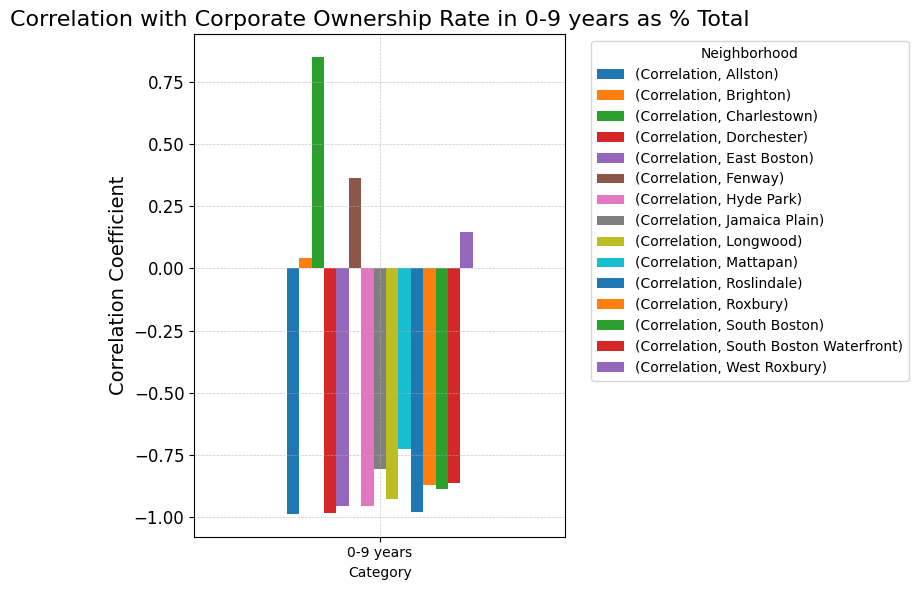

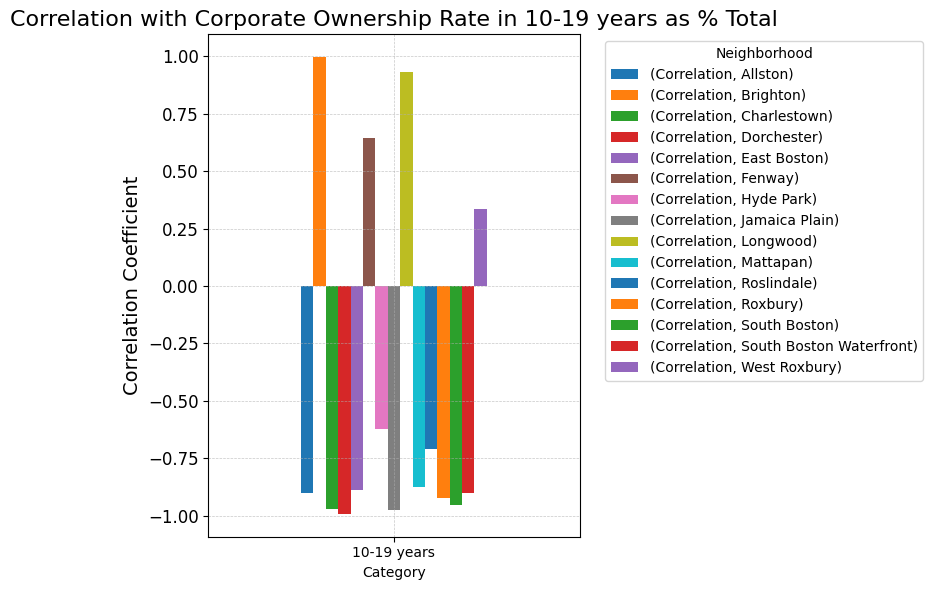

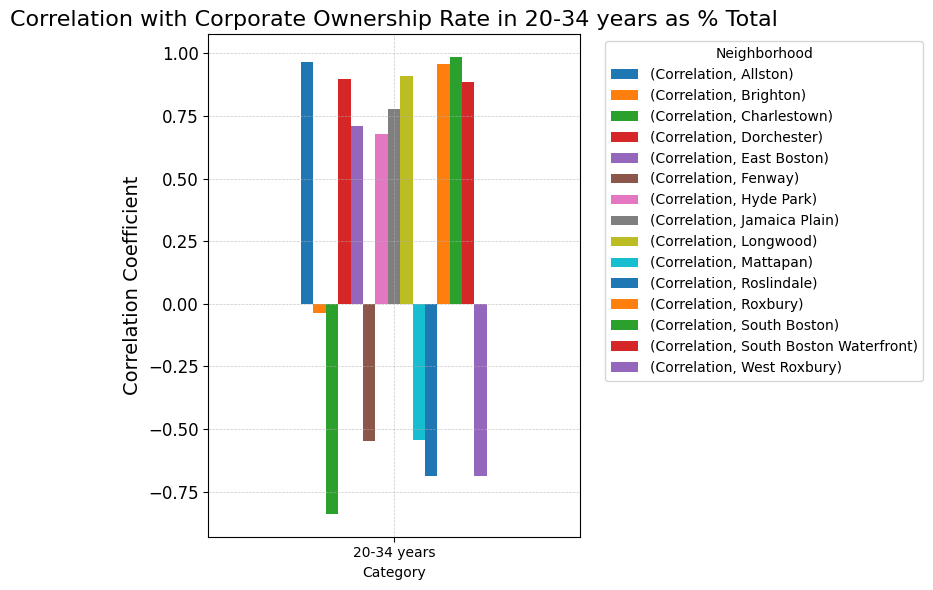

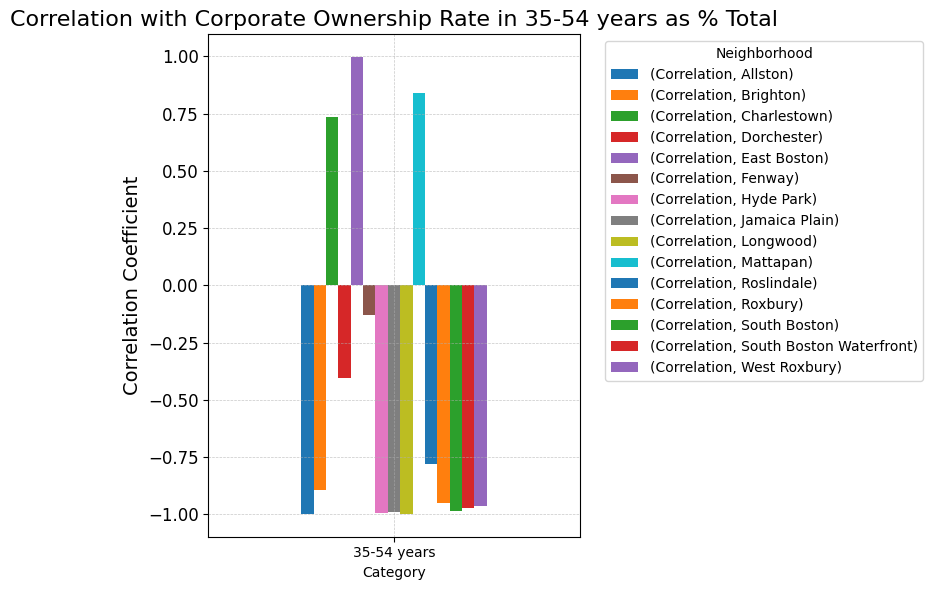

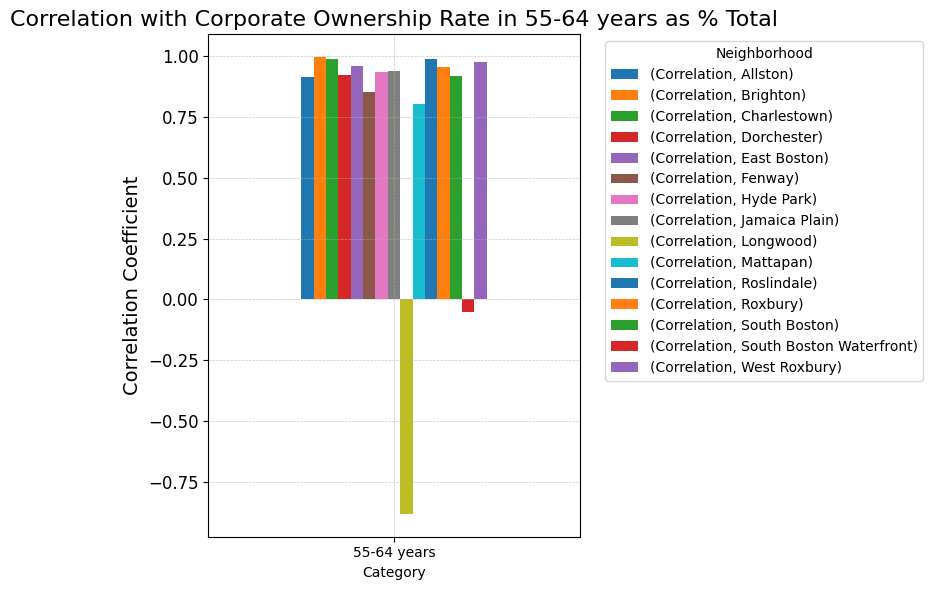

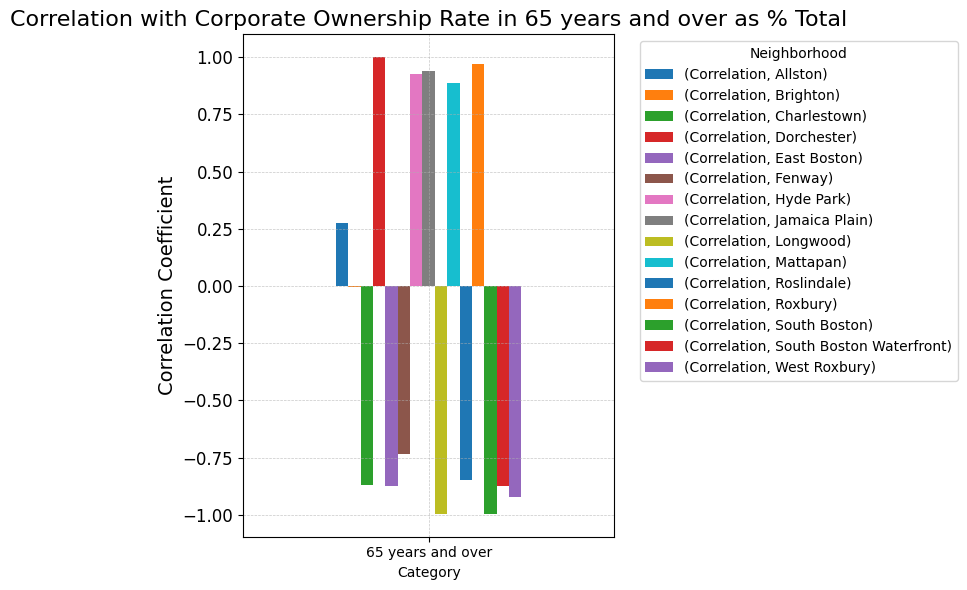

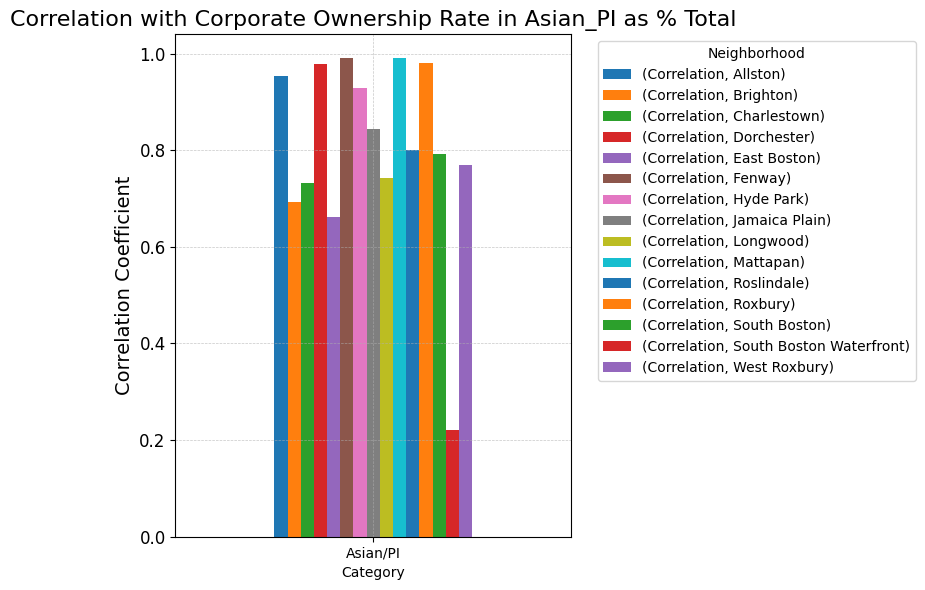

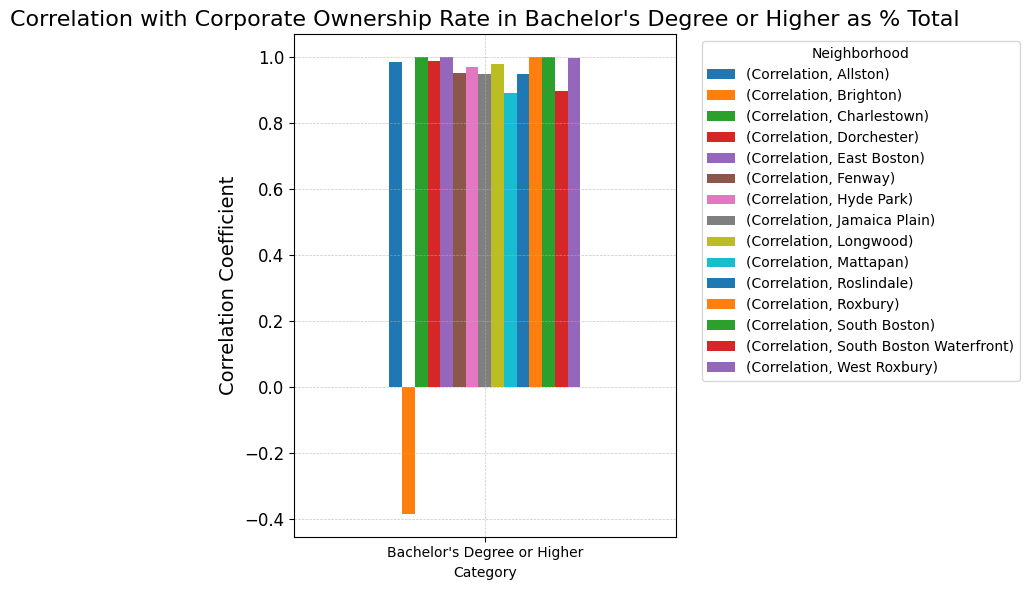

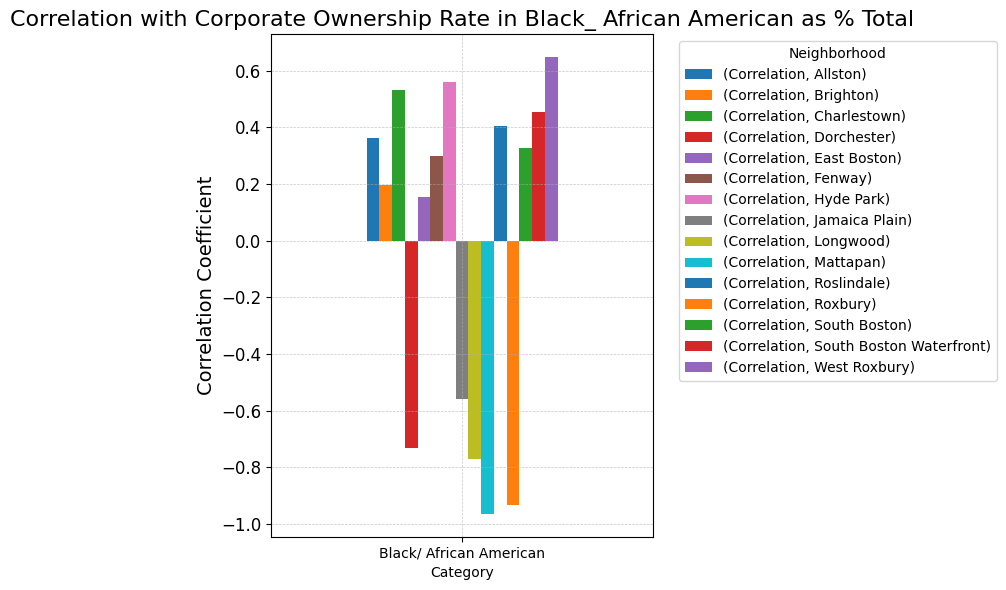

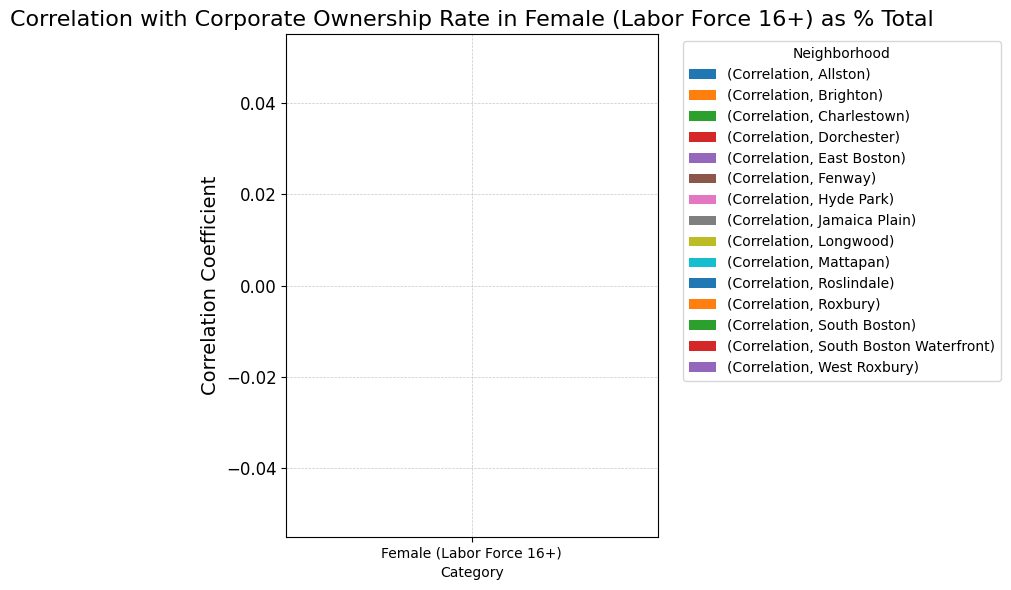

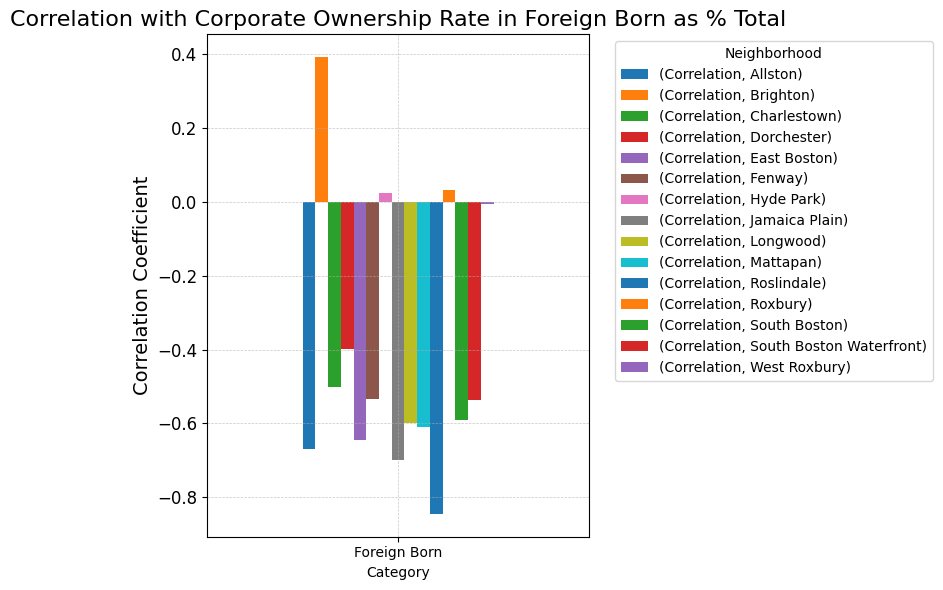

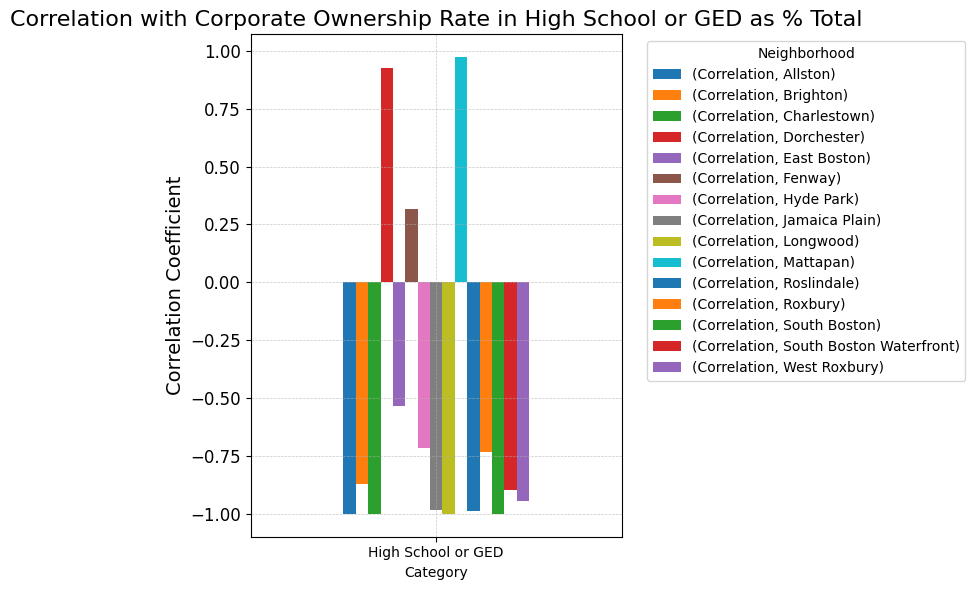

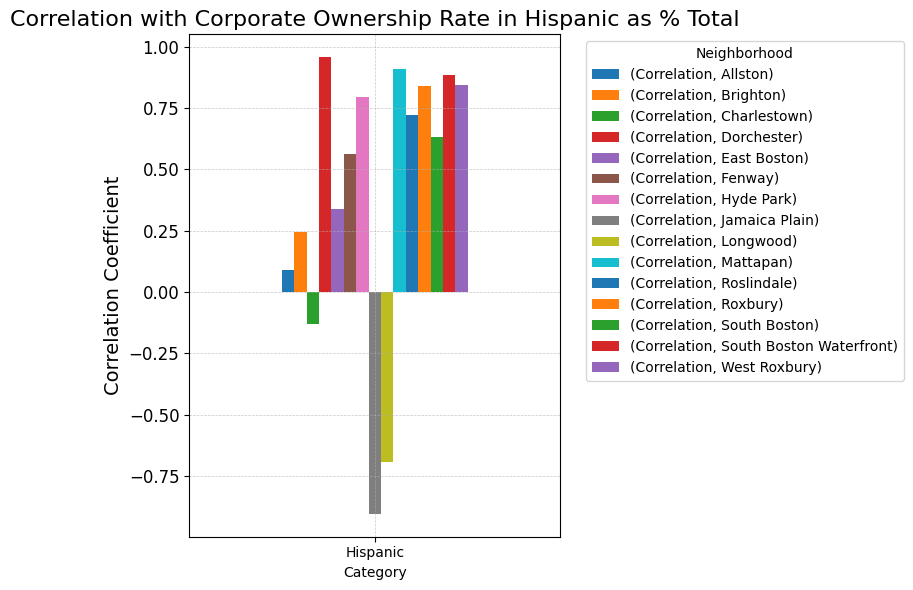

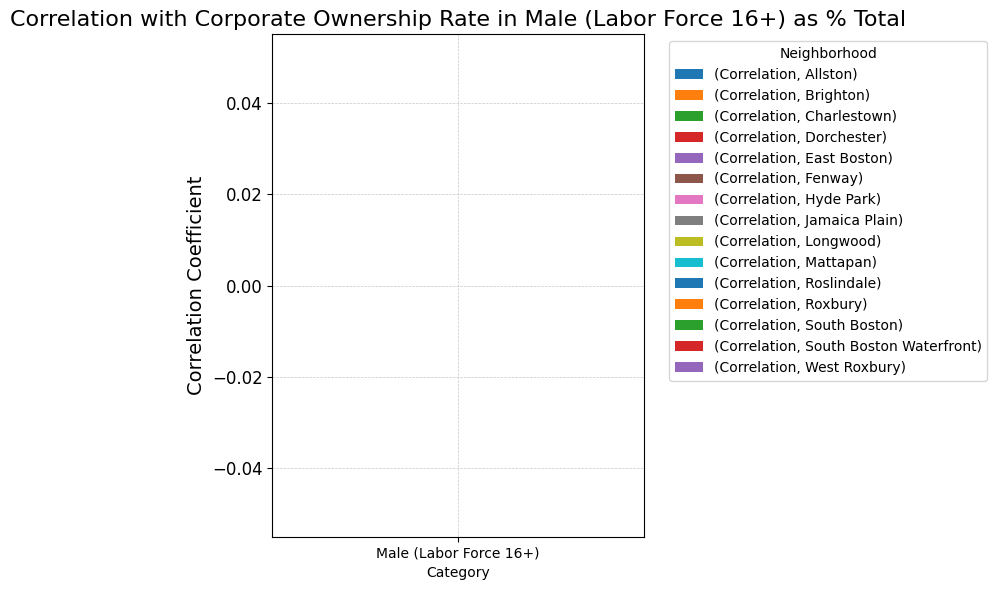

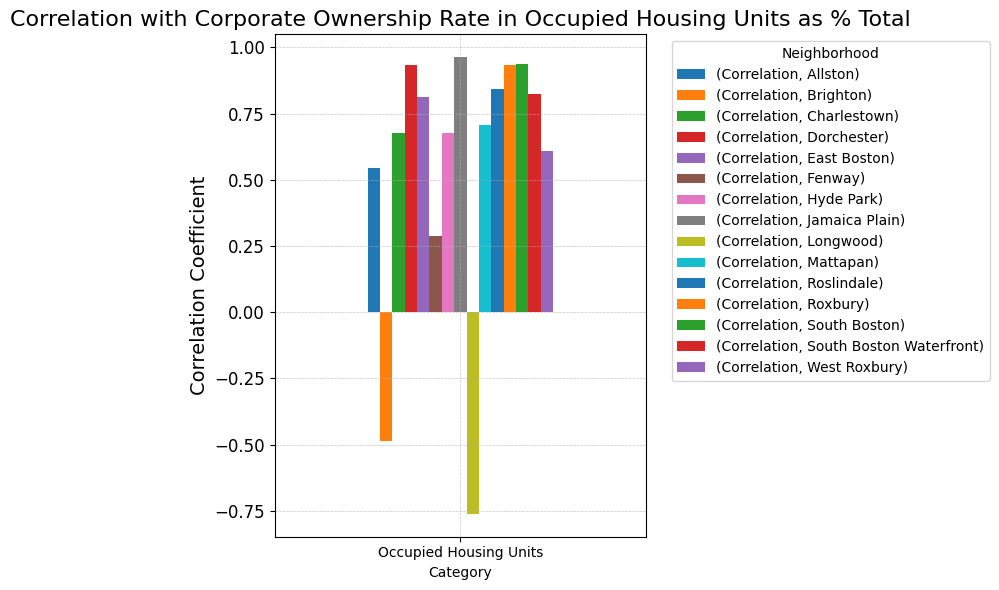

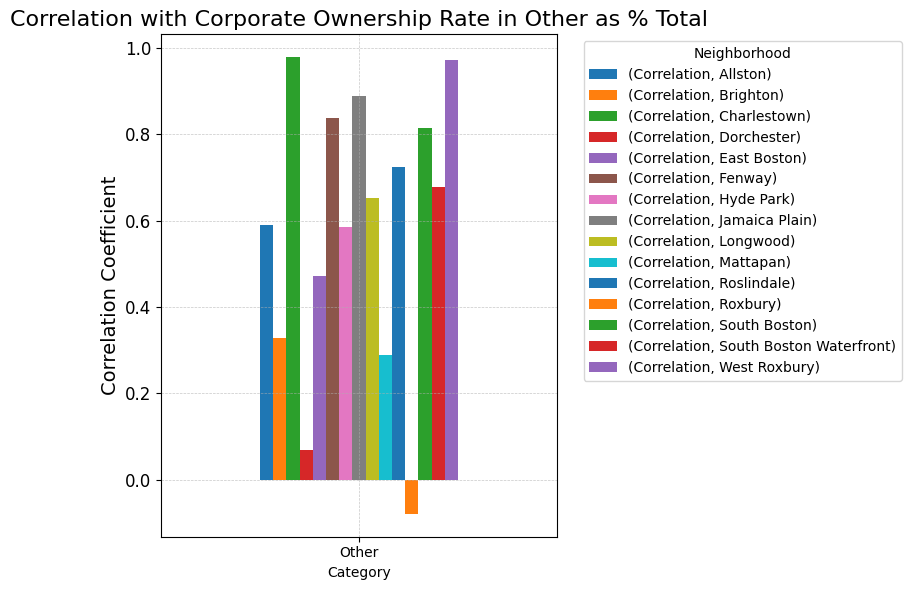

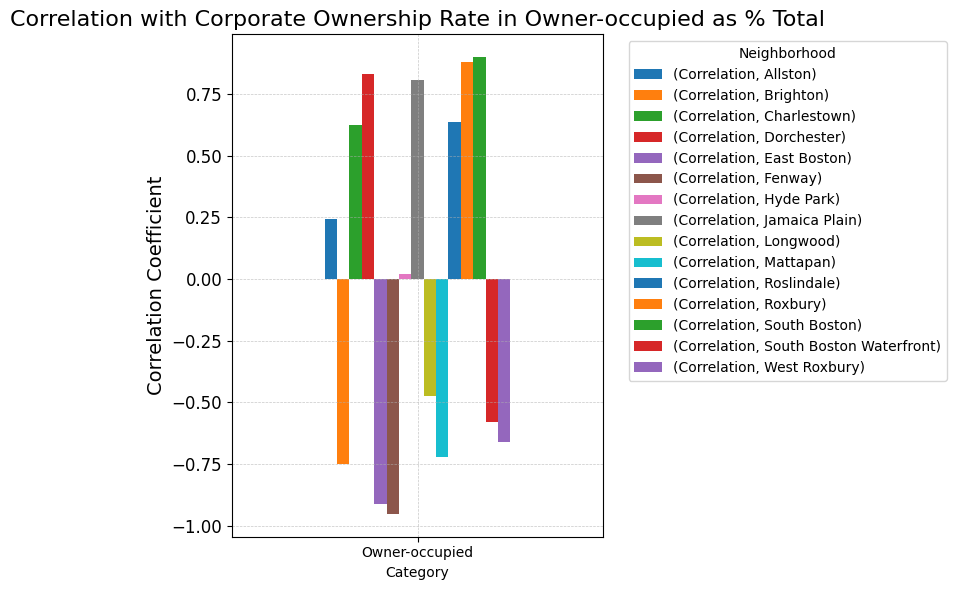

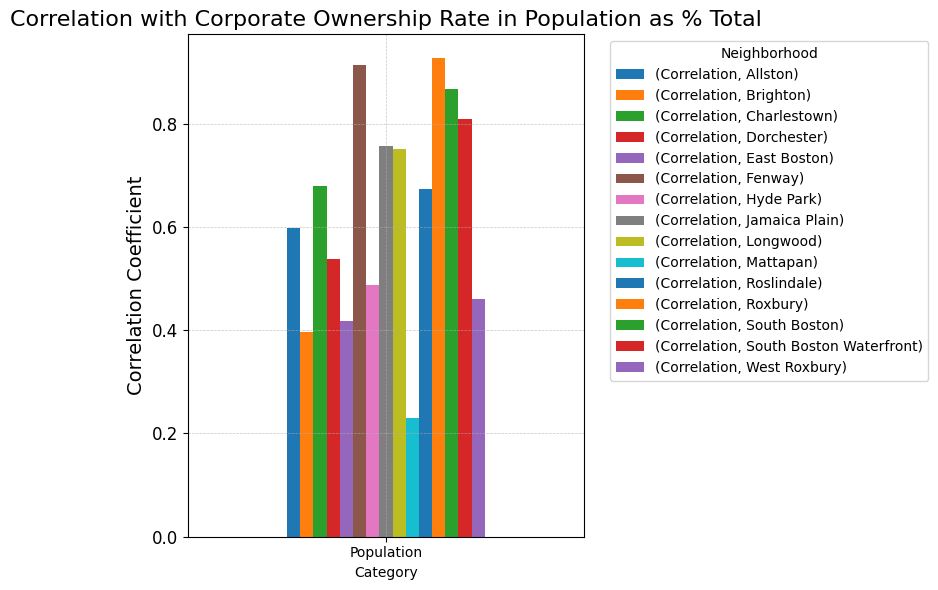

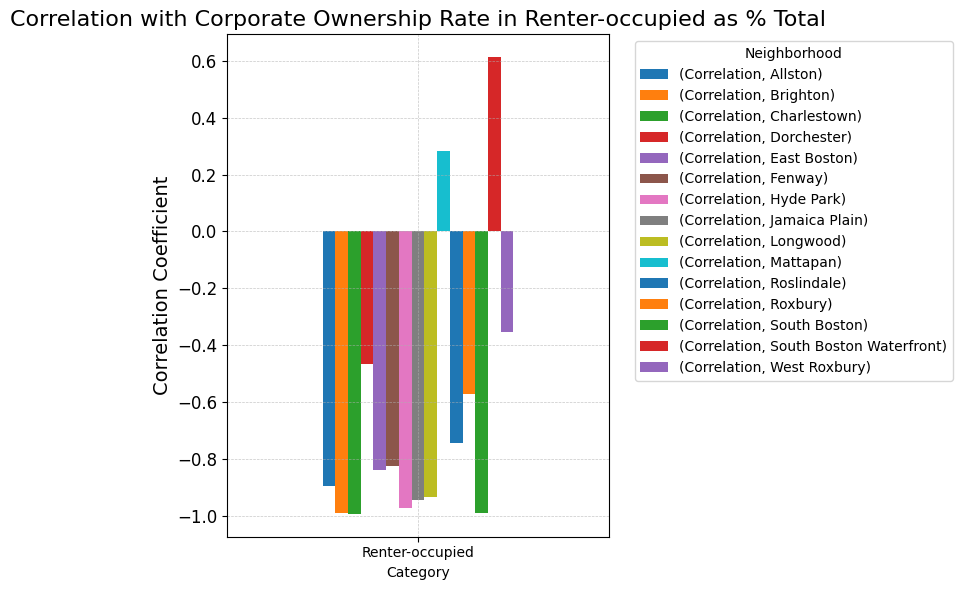

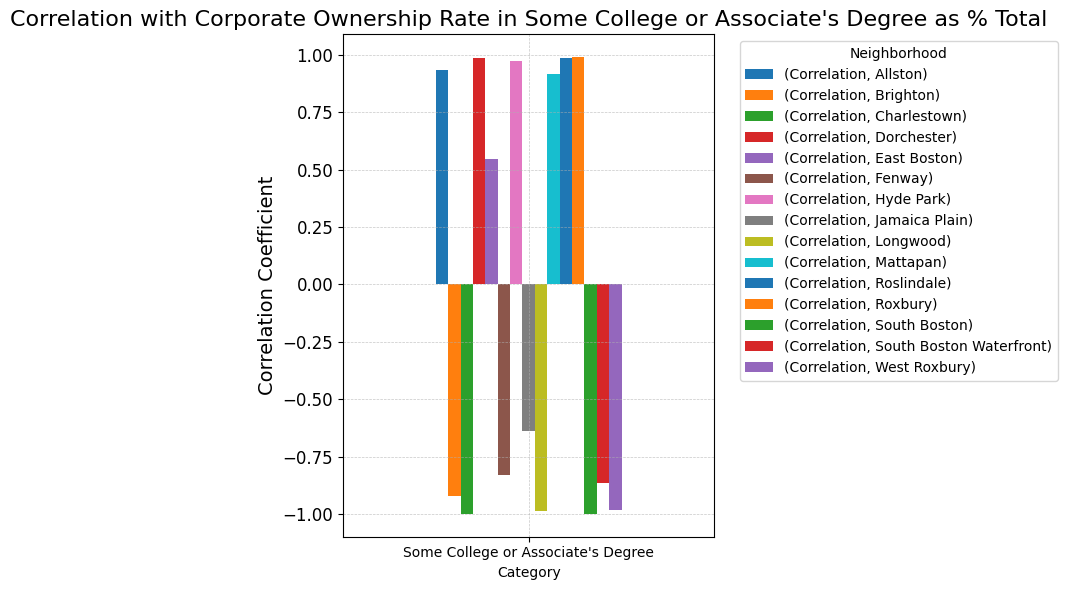

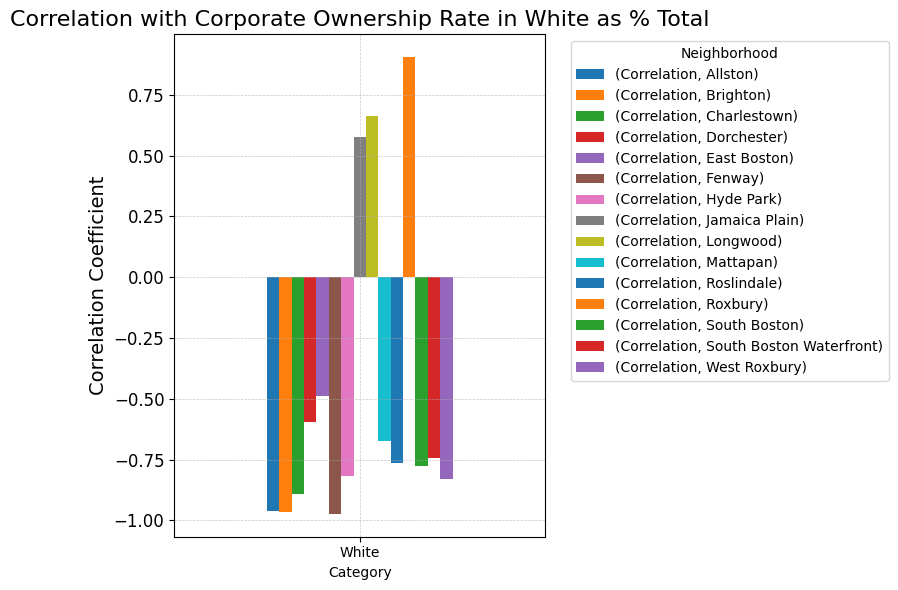

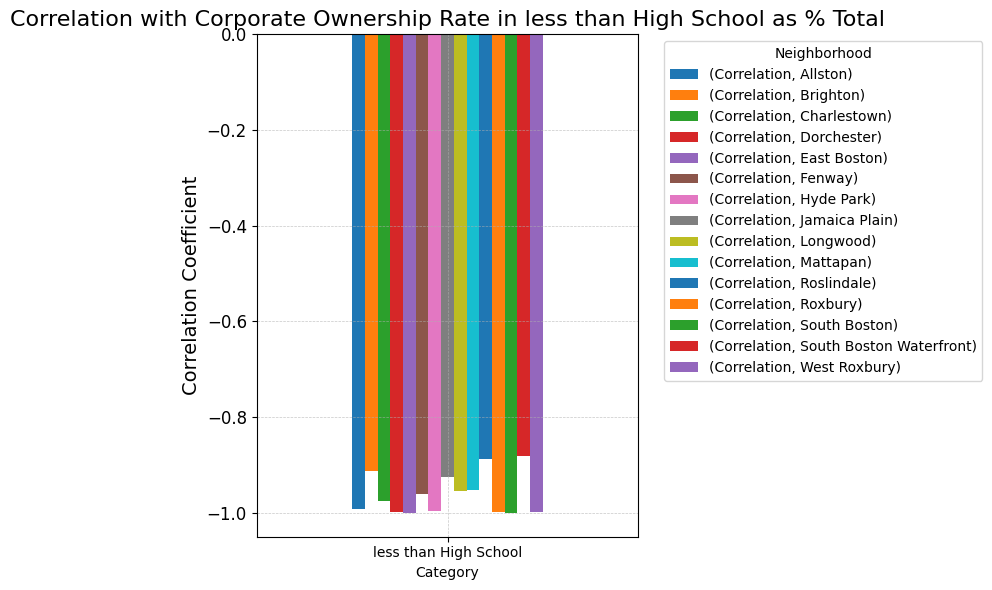

In [12]:
for feature, values in correlation_df.groupby(level=0):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
    values.unstack().plot(kind='bar', ax=ax)
    
    # Customize the plot
    title = f'Correlation with Corporate Ownership Rate in {feature} as % Total'
    title = title.replace("/", "_")
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Correlation Coefficient', fontsize=14)
    ax.tick_params(axis='x', labelsize=10, rotation=0)  # Make x-axis labels horizontal
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Place the legend outside of the figure/plot
    ax.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the padding to make room for the legend
    plt.savefig(title)

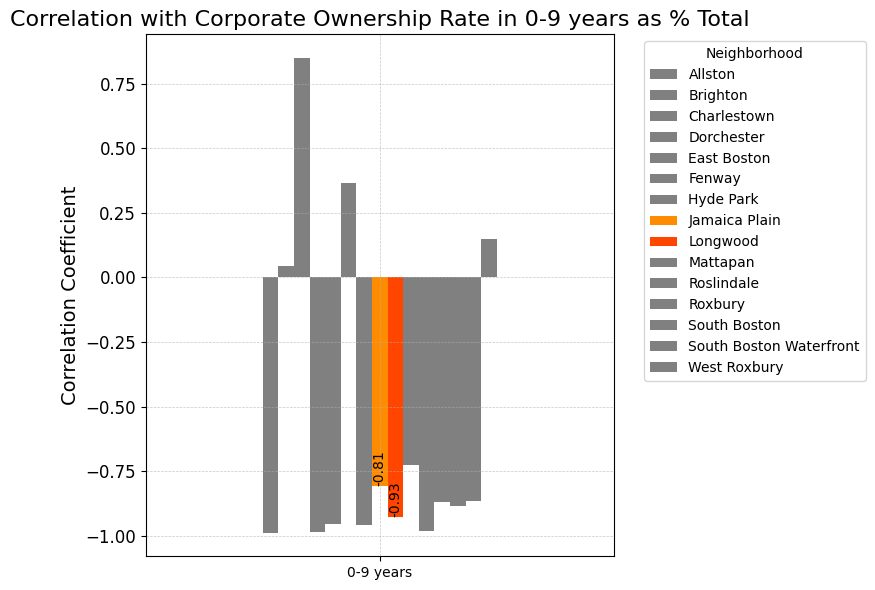

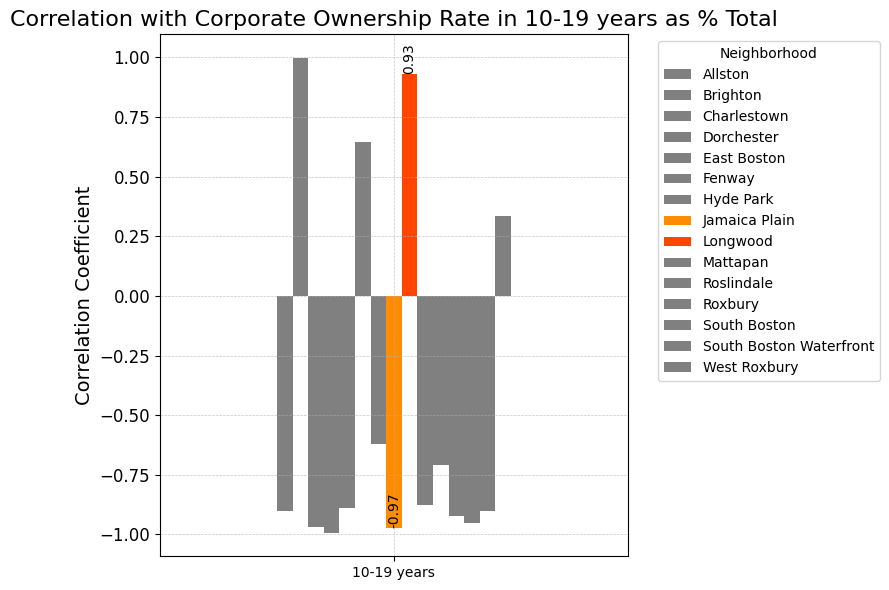

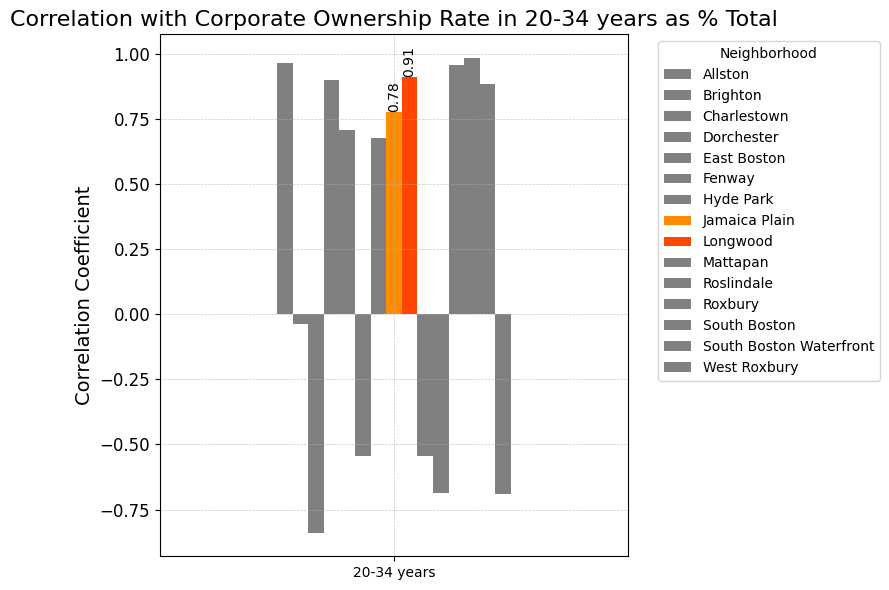

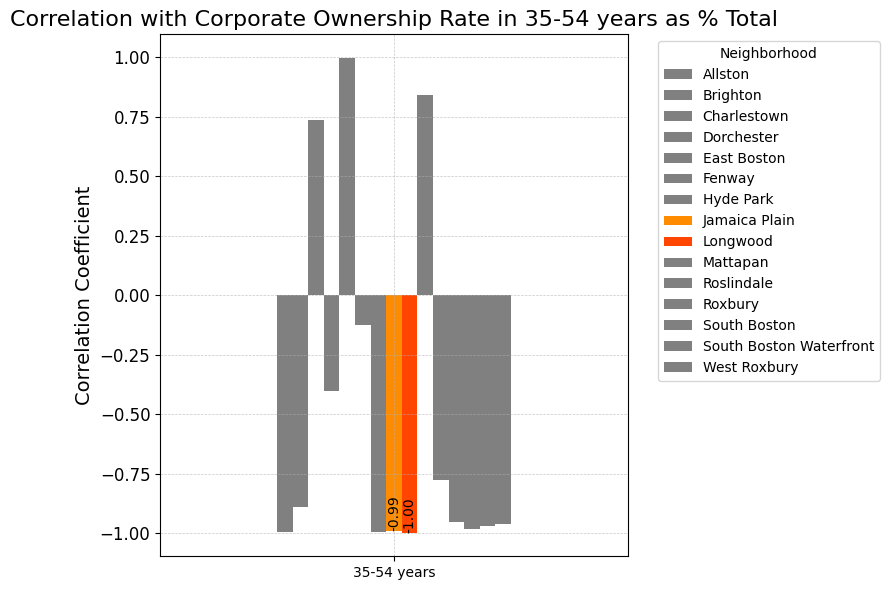

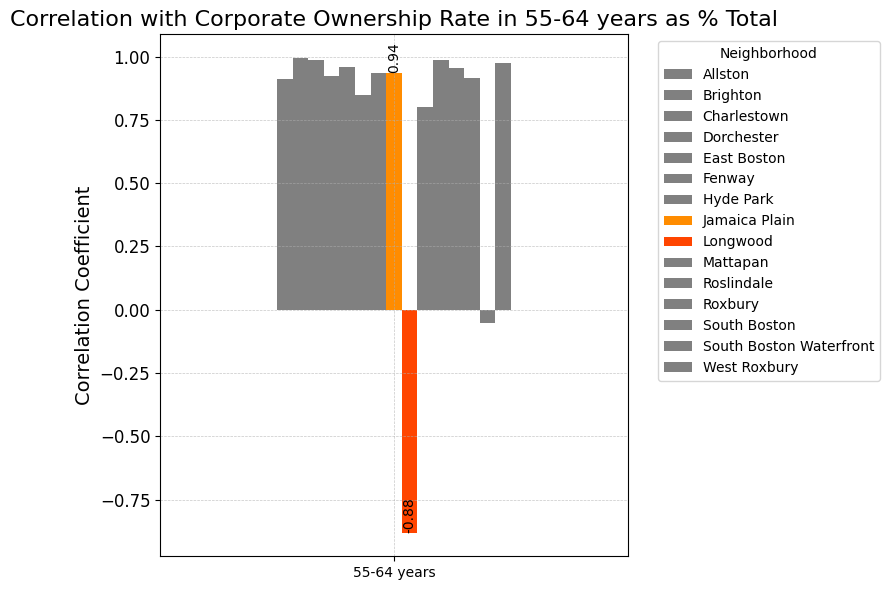

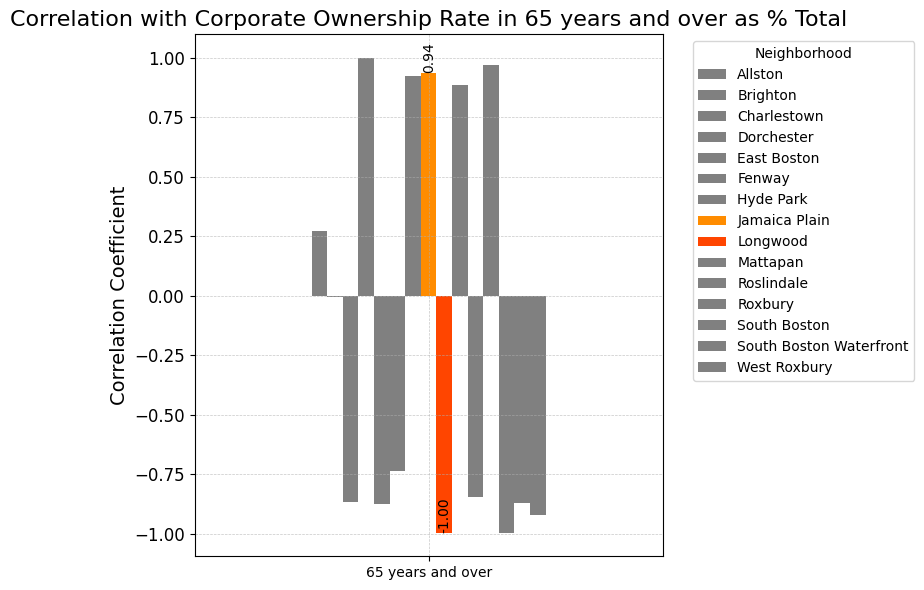

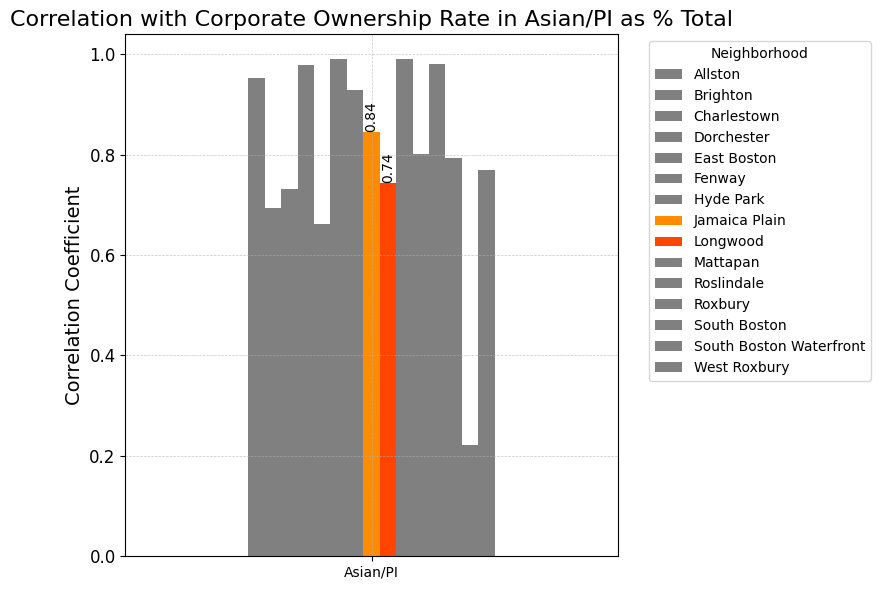

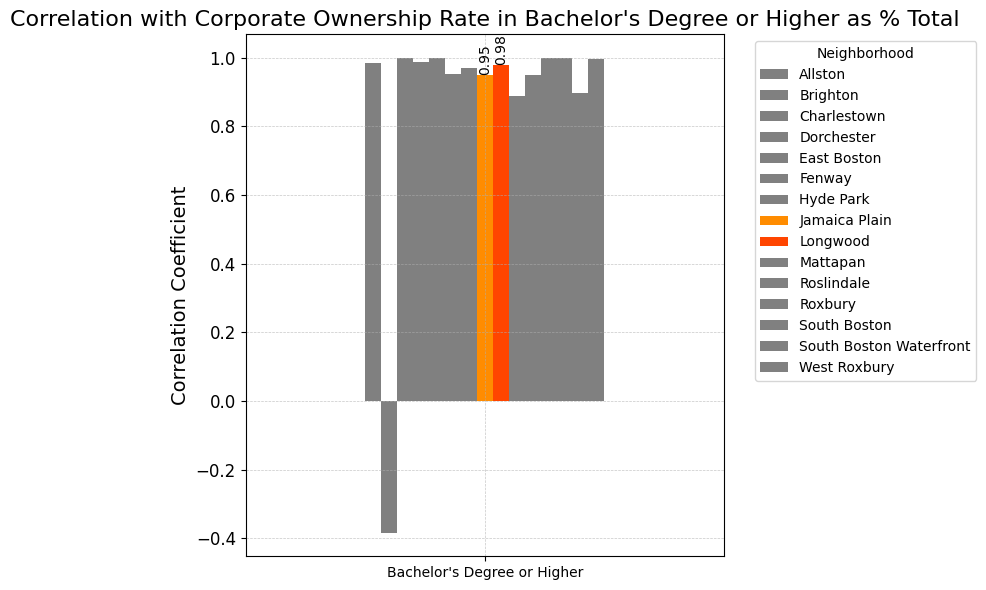

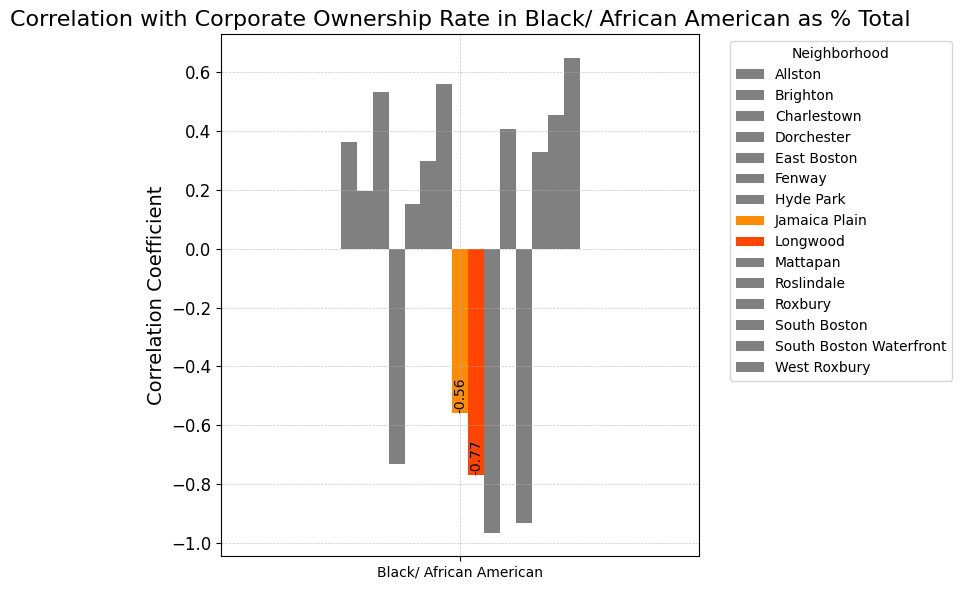

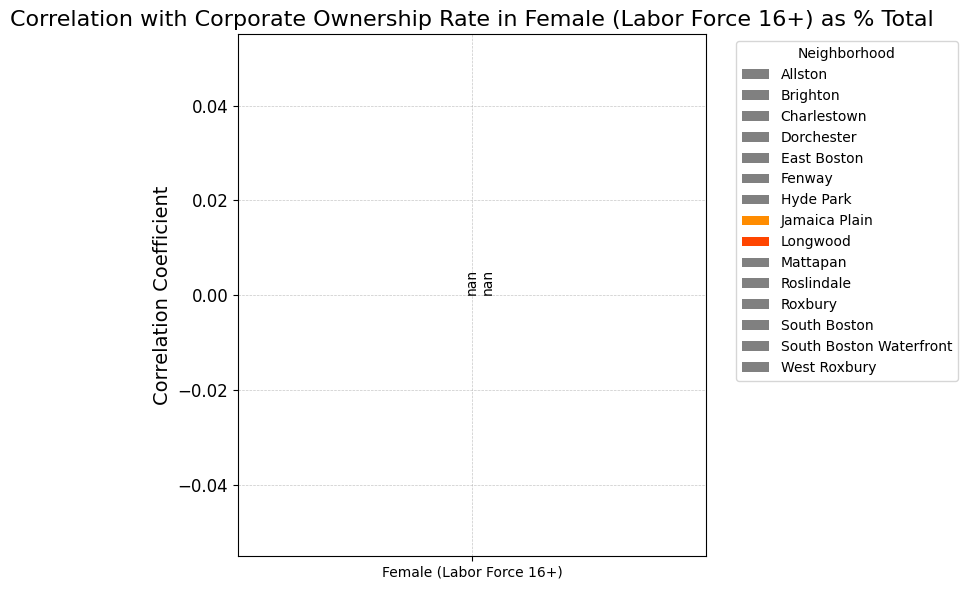

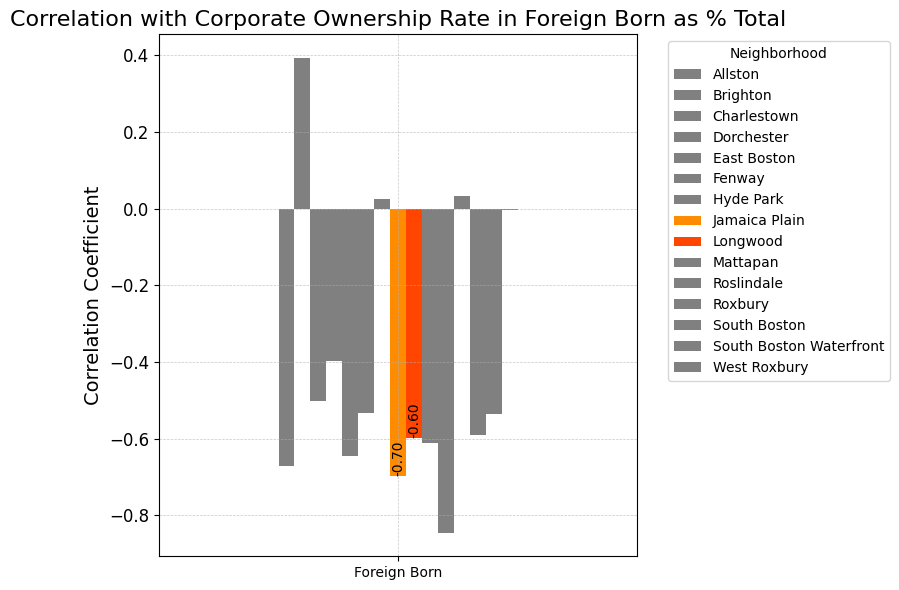

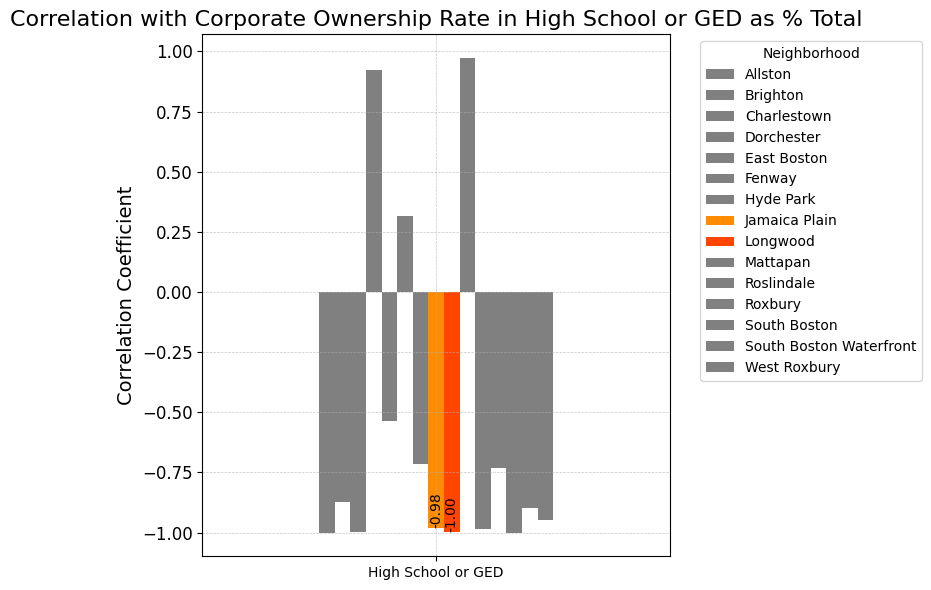

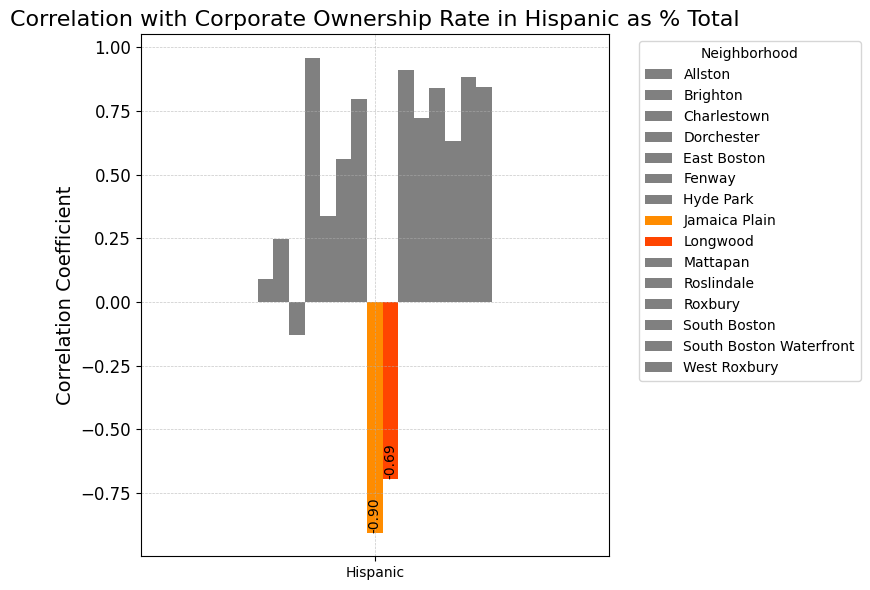

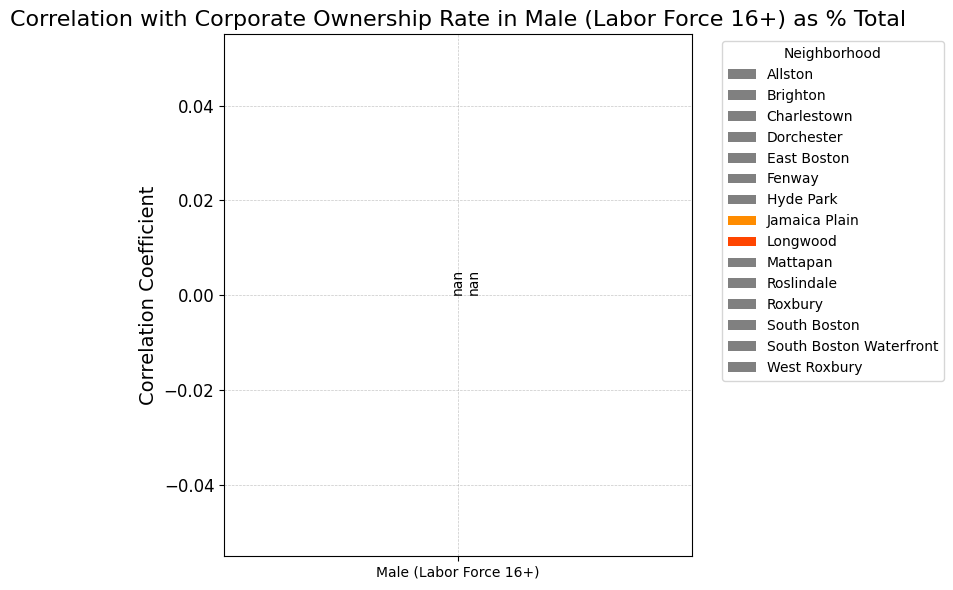

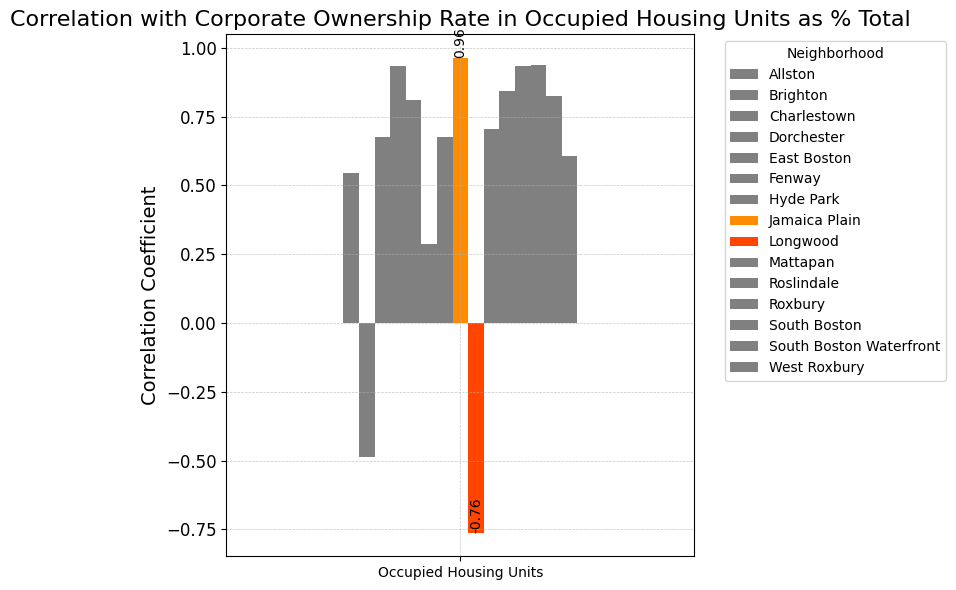

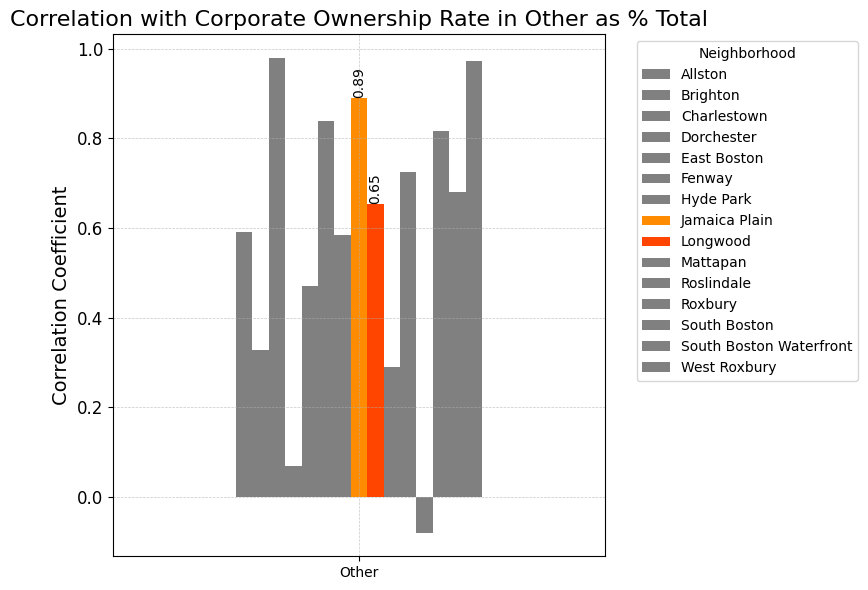

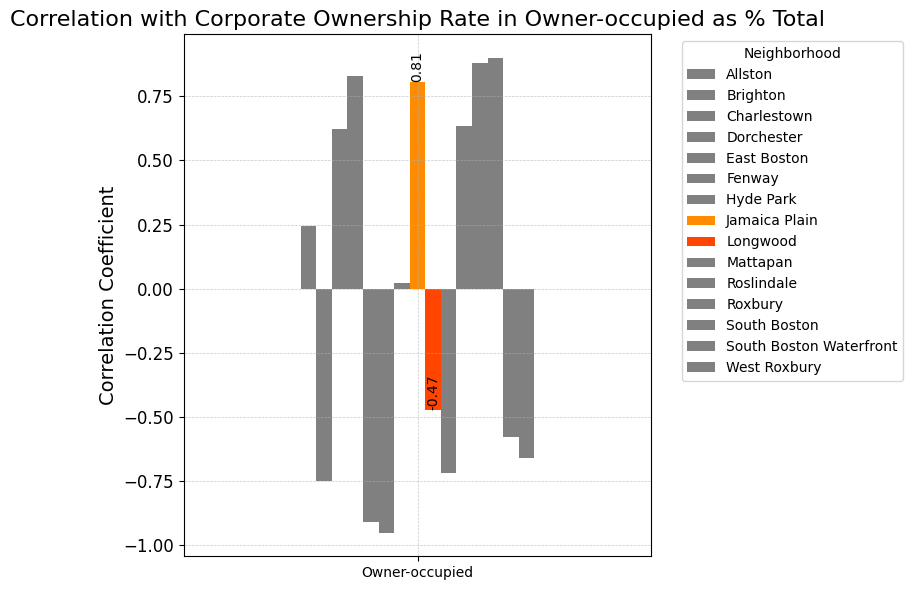

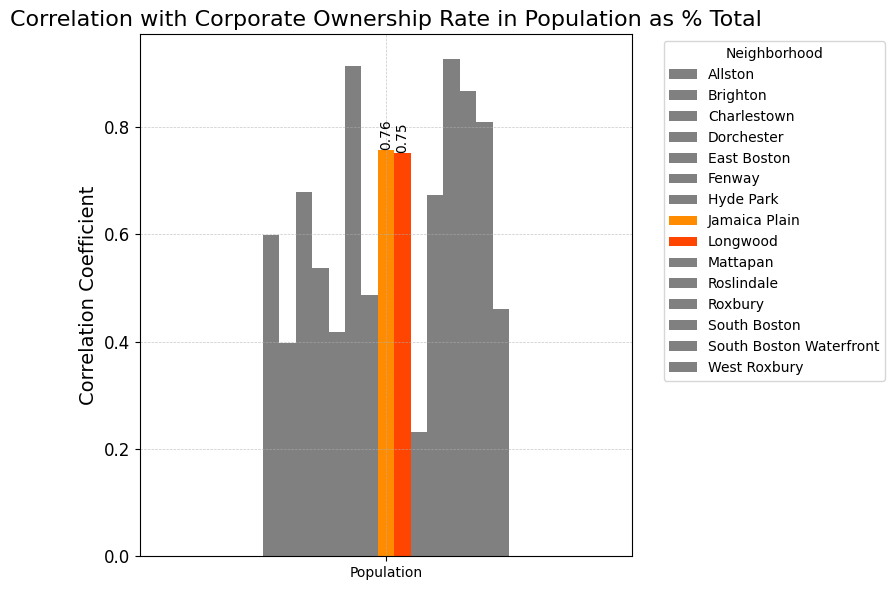

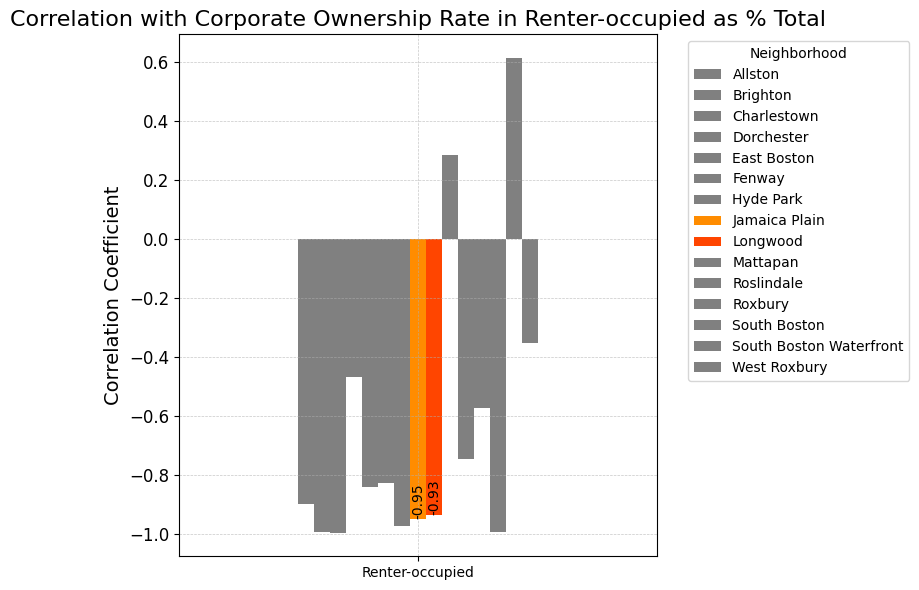

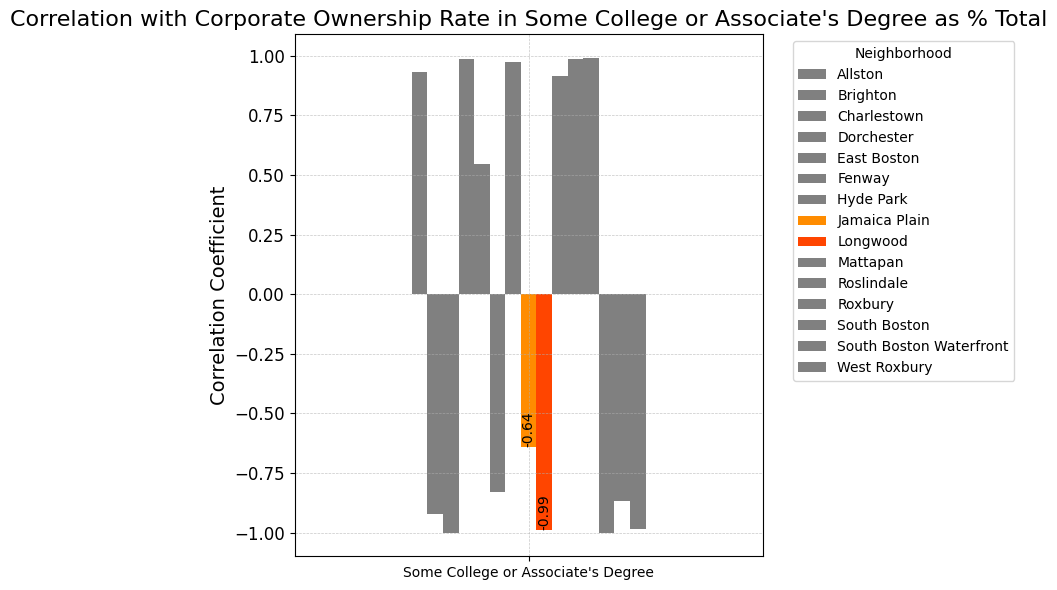

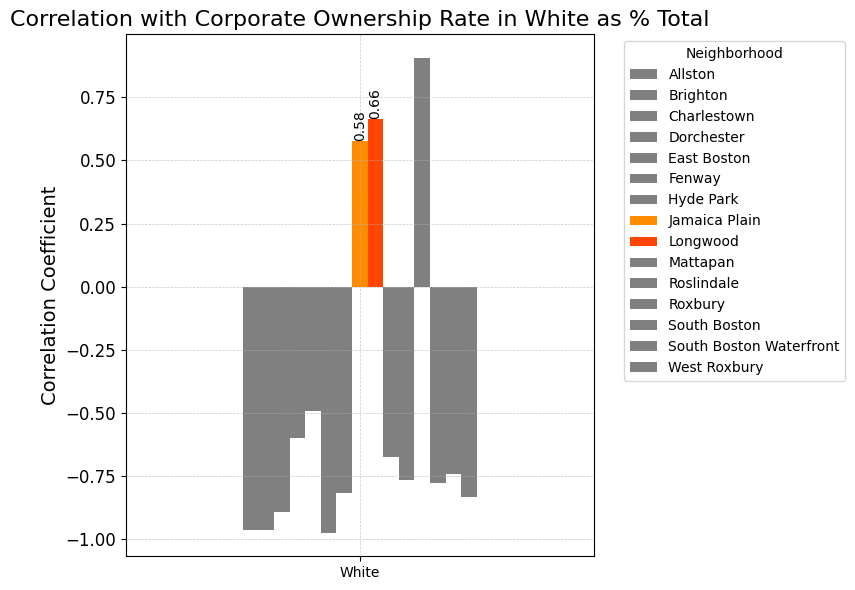

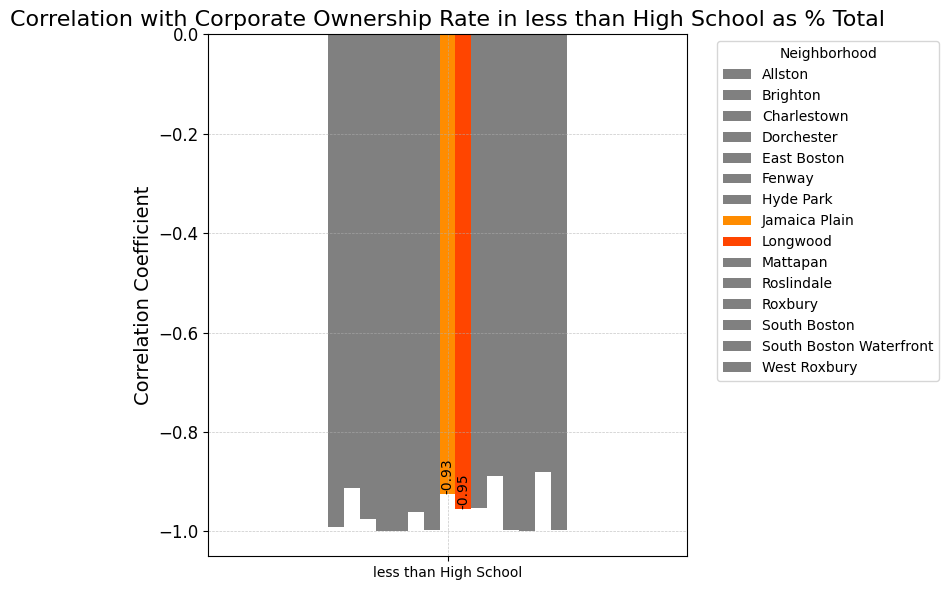

In [13]:
for feature, values in correlation_df.groupby(level=0):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
    values = values.unstack()
    
    # Create a color list, where 'Longwood' is red, 'Jamaica Plain' is dark red or pink, and others are grey
    colors = ['orangered' if x == 'Longwood' else 'darkorange' if x == 'Jamaica Plain' else 'grey' for x in values.columns.get_level_values('Neighborhood').tolist()]
    
    # Plotting the bars
    bars = values.plot(kind='bar', ax=ax, color=colors)
    
    # Customize the plot
    ax.set_title(f'Correlation with Corporate Ownership Rate in {feature} as % Total', fontsize=16)
    ax.set_ylabel('Correlation Coefficient', fontsize=14)
    ax.set_xlabel('')  # Remove the x-axis label
    ax.tick_params(axis='x', labelsize=10, rotation=0)  # Make x-axis labels horizontal
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Loop through the bars and add vertical labels for 'Jamaica Plain' and 'Longwood'
    for bar, label, value in zip(ax.patches, values.columns.get_level_values('Neighborhood').tolist(), values.iloc[0]):
        if label in ['Jamaica Plain', 'Longwood']:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
                    ha='center', va='bottom', color='black', fontsize=10, rotation=90)  # Vertical text
    
    # Extracting the current handles and labels
    handles, labels = ax.get_legend_handles_labels()
    # Only taking the neighborhood name as the label (ignoring 'Correlation')
    new_labels = [label.split(', ')[1].strip(')') for label in labels]
    
    # Place the legend outside of the figure/plot with updated labels
    ax.legend(handles, new_labels, title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the padding to make room for the legend
    plt.show()

    # Save the figure as PNG with a specific DPI for consistent resolution
    feature_cleaned = feature.replace("/", "_")
    fig.savefig(f'{feature_cleaned}_Longwood_Jamaica.png', dpi=300, bbox_inches='tight')

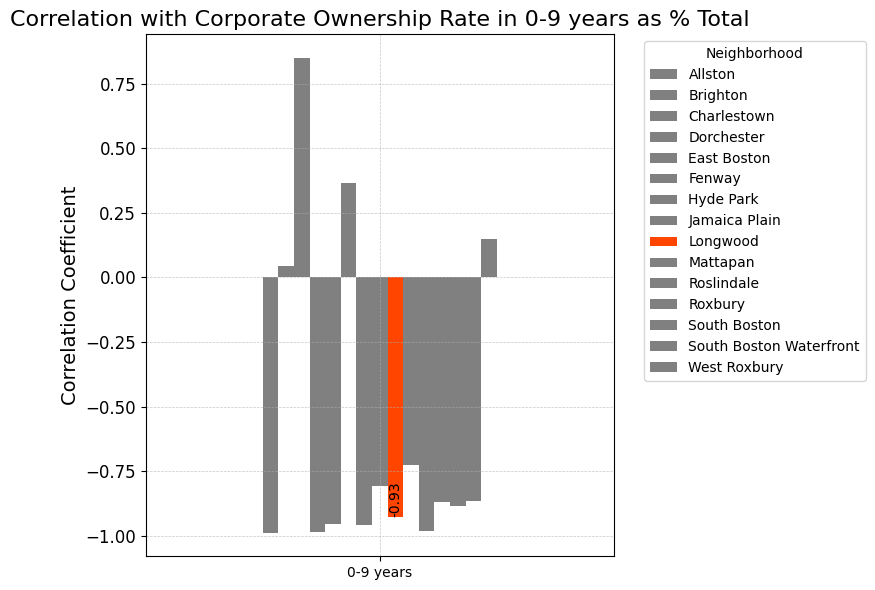

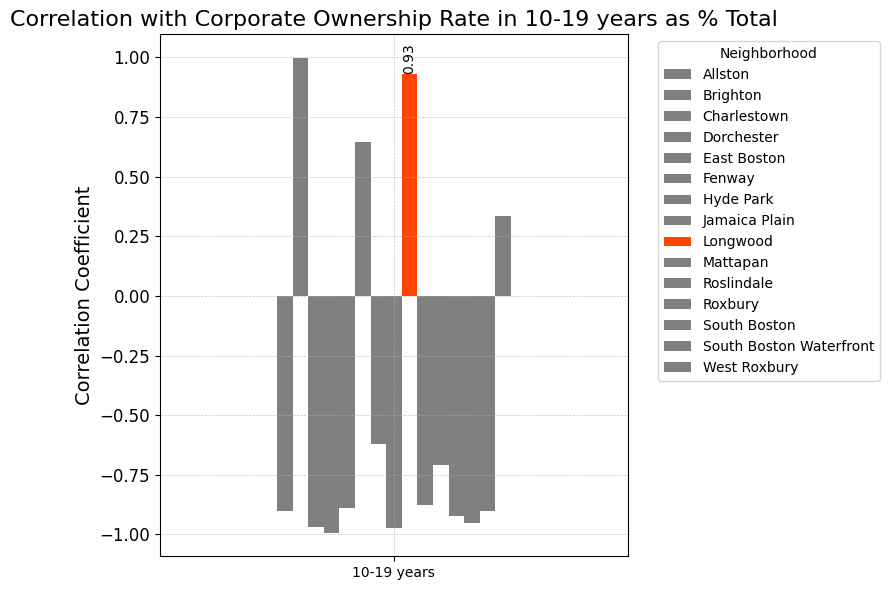

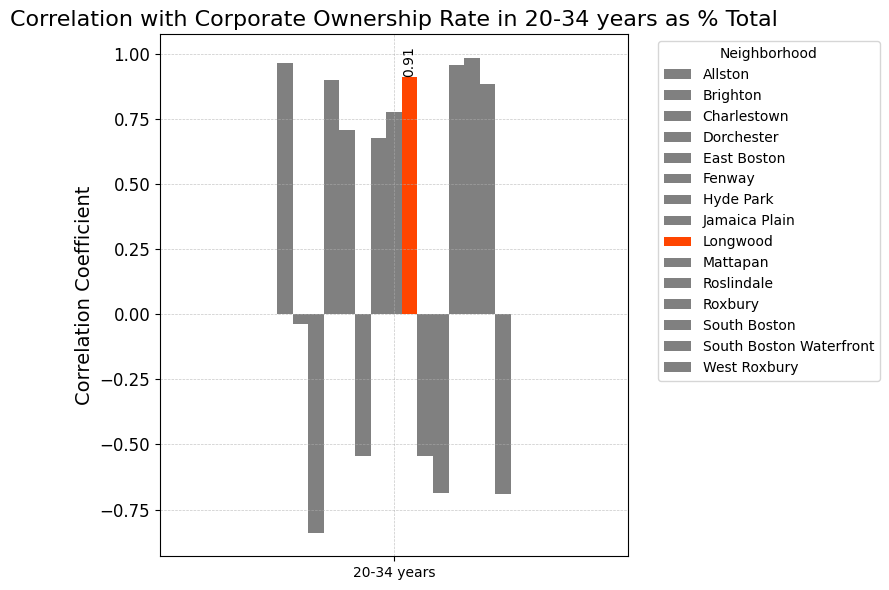

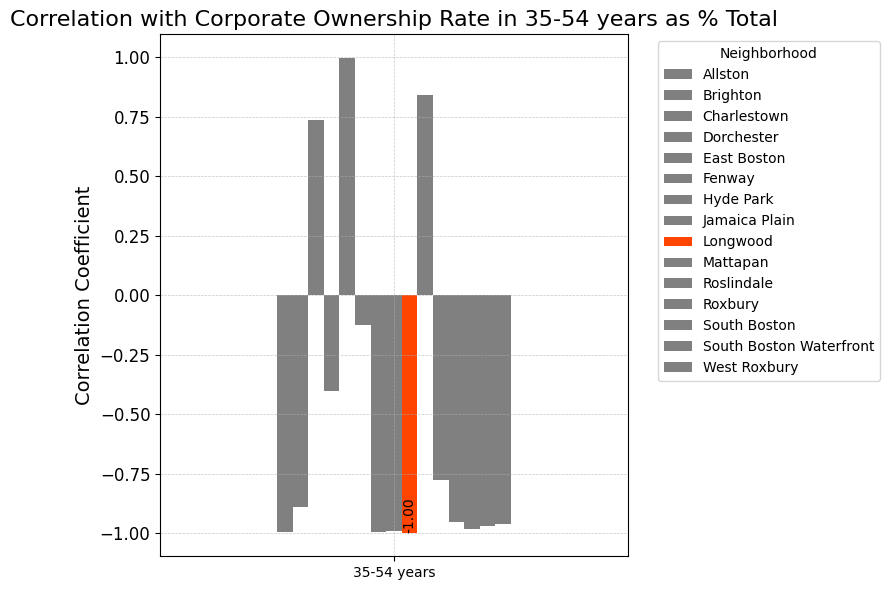

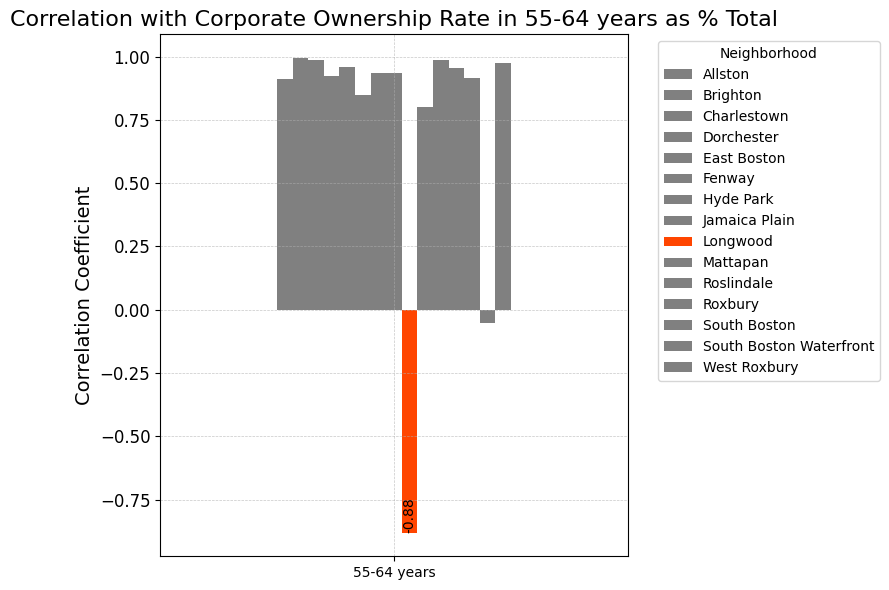

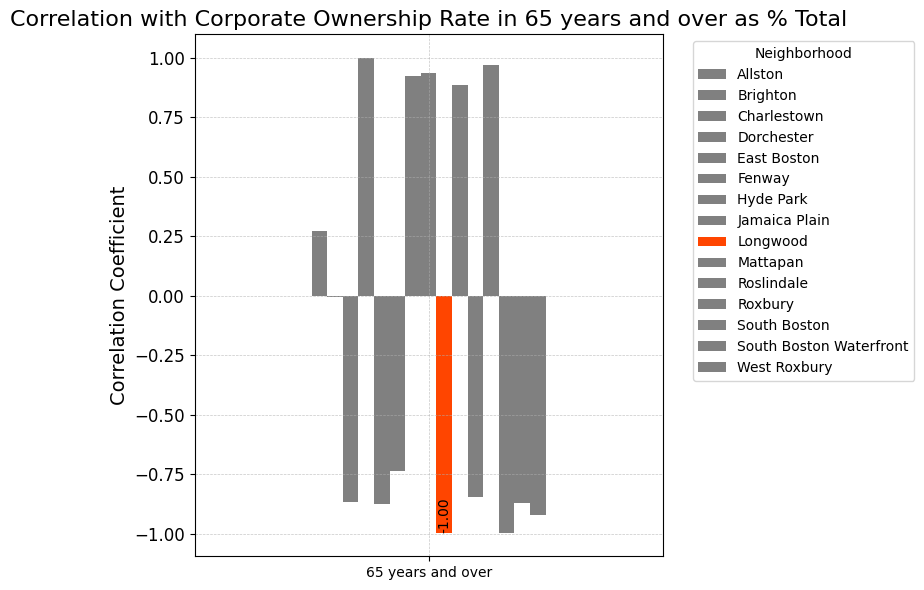

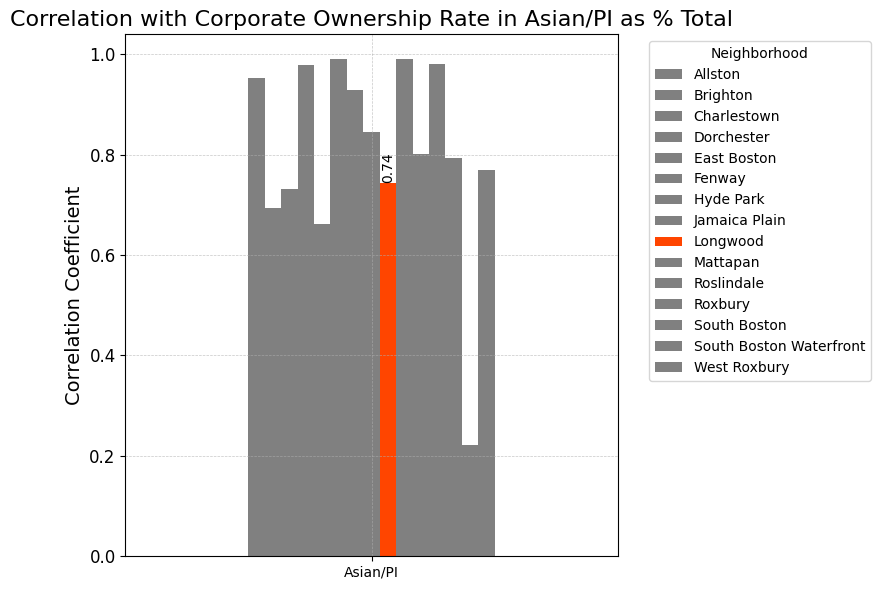

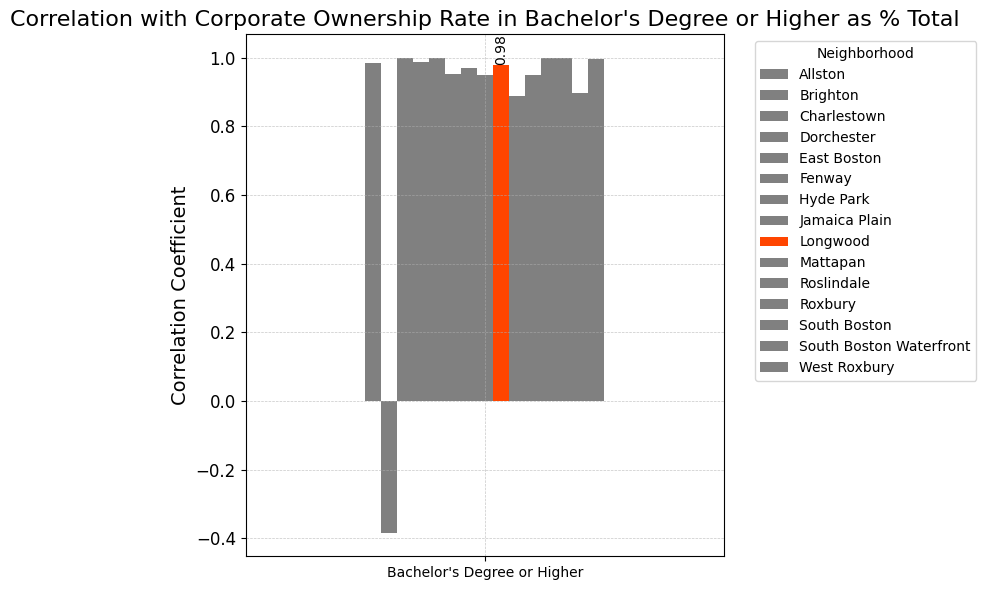

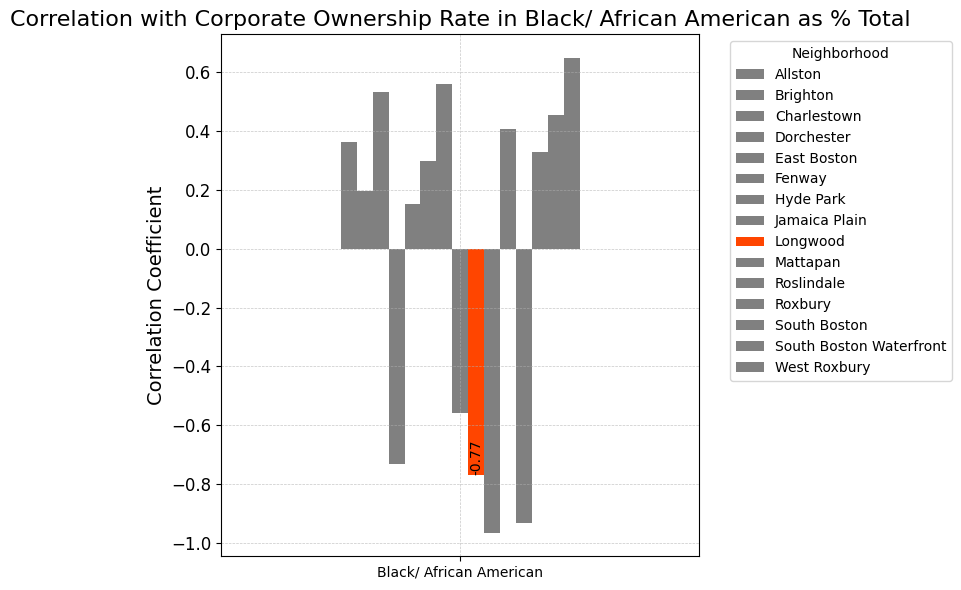

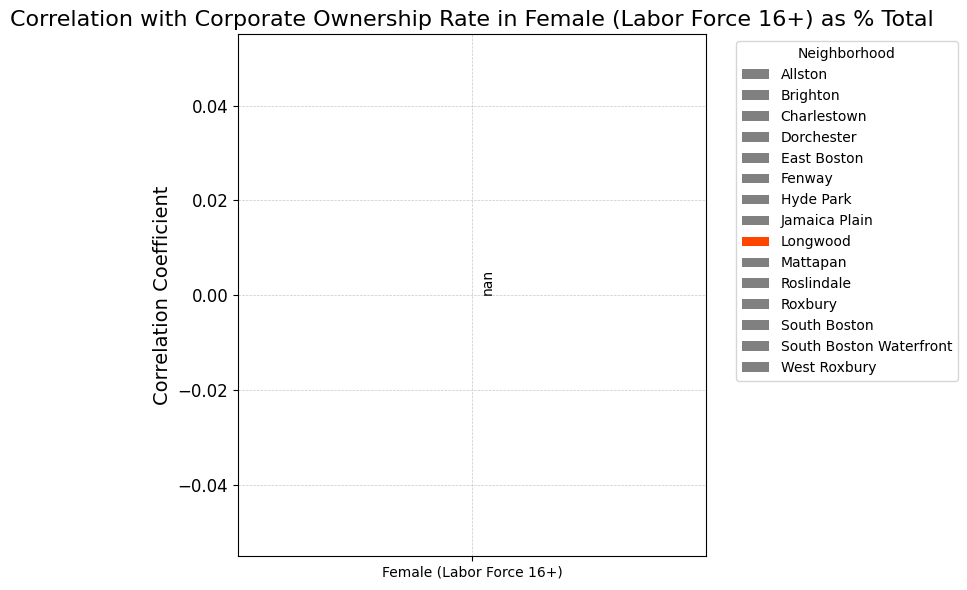

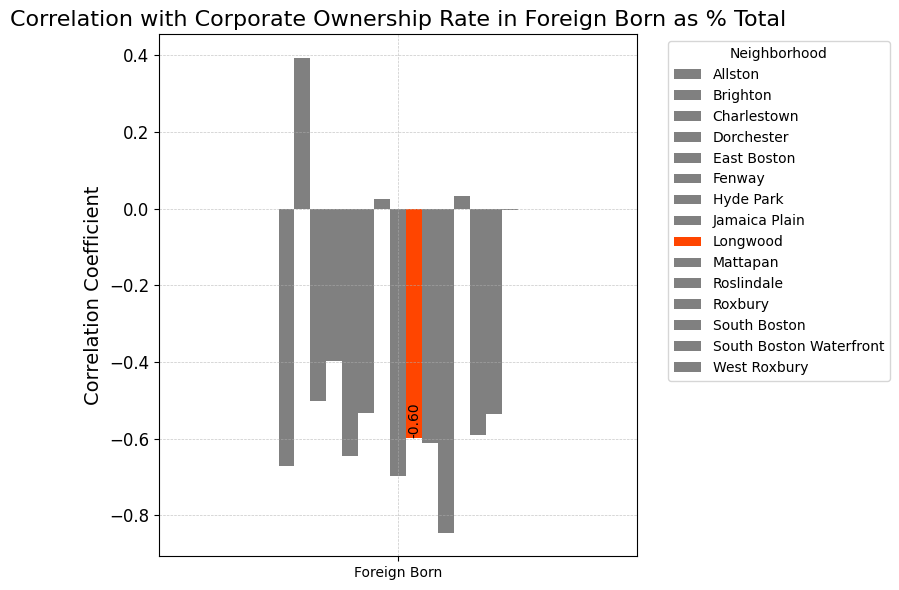

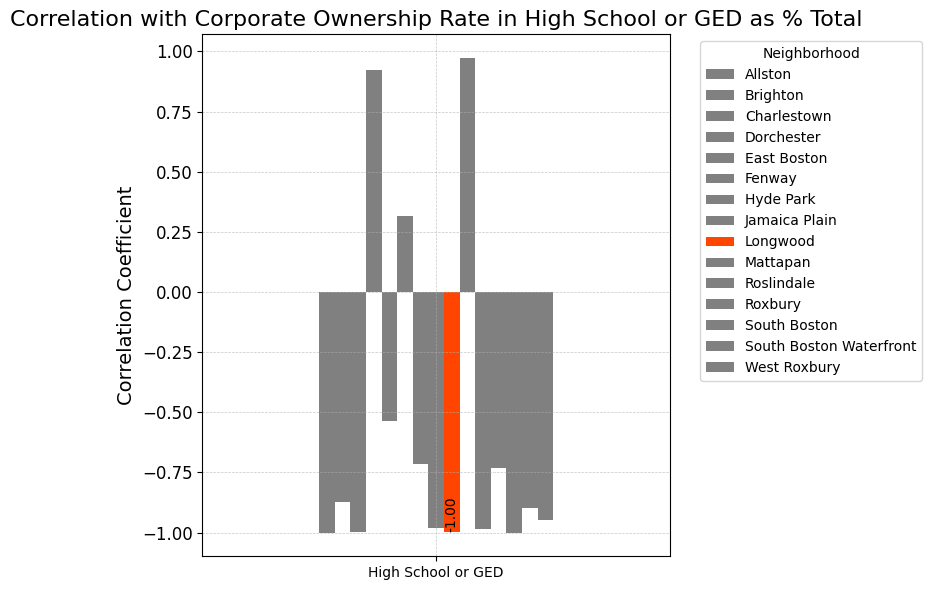

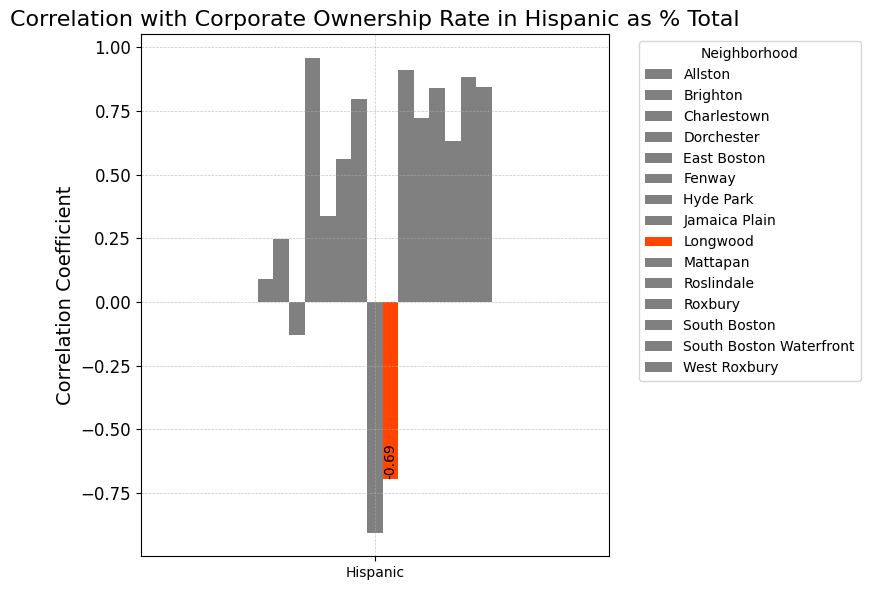

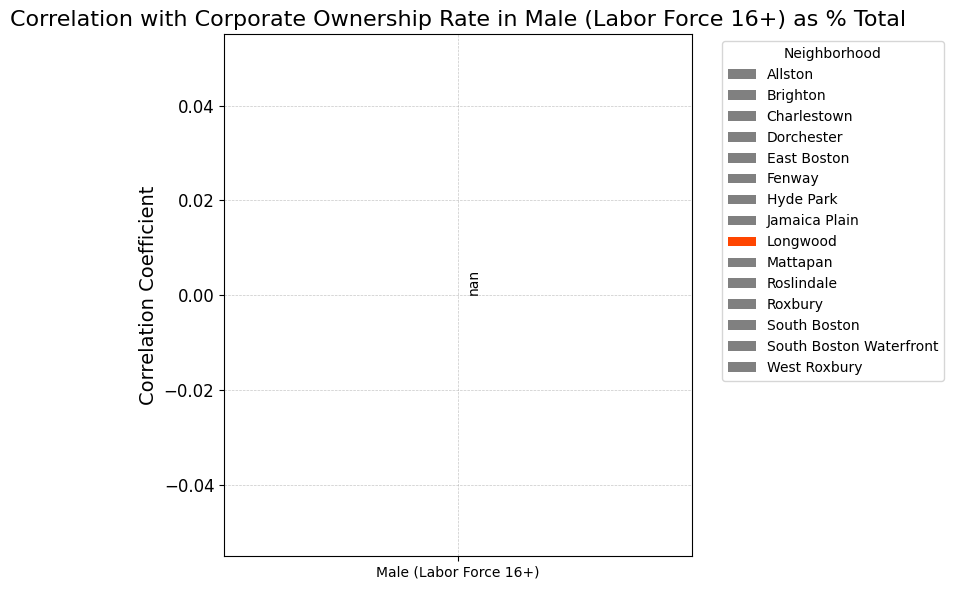

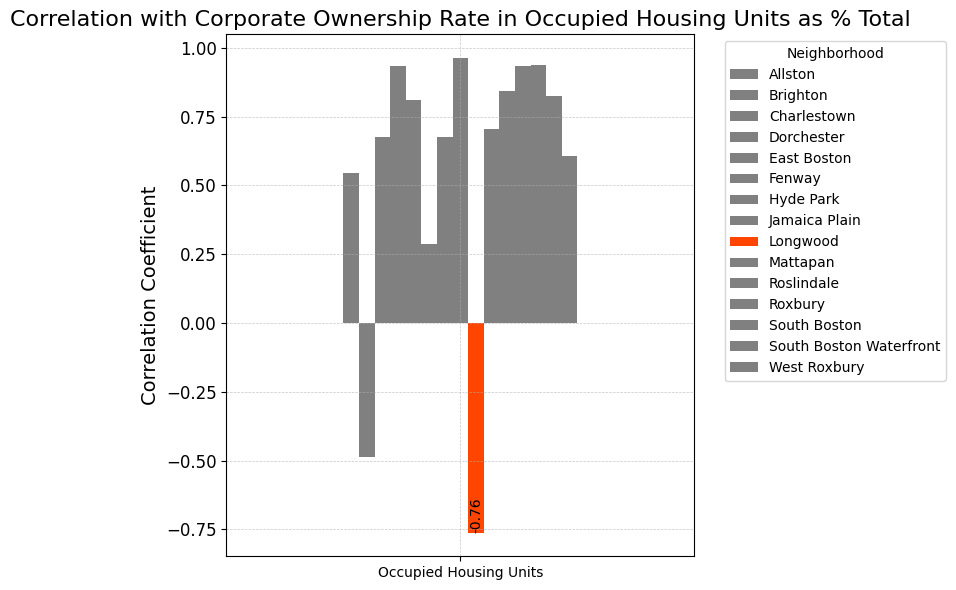

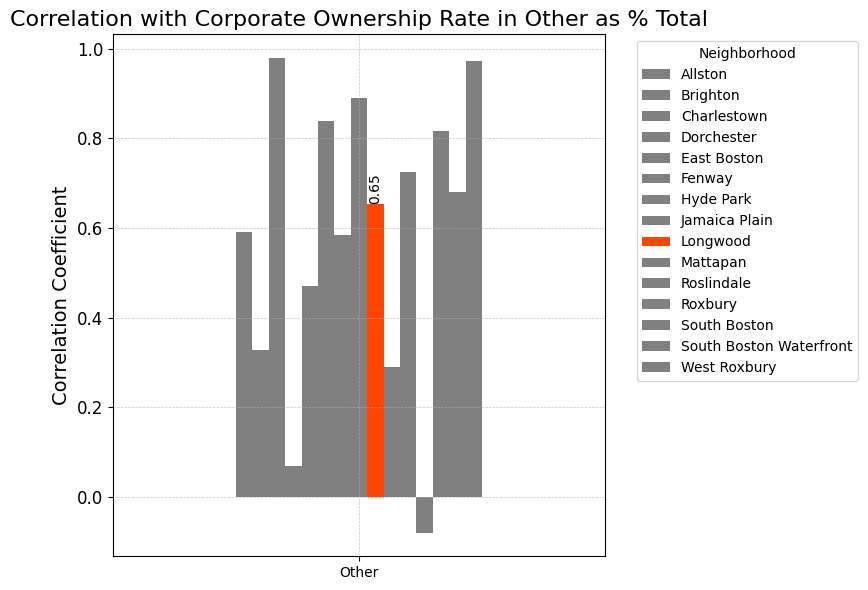

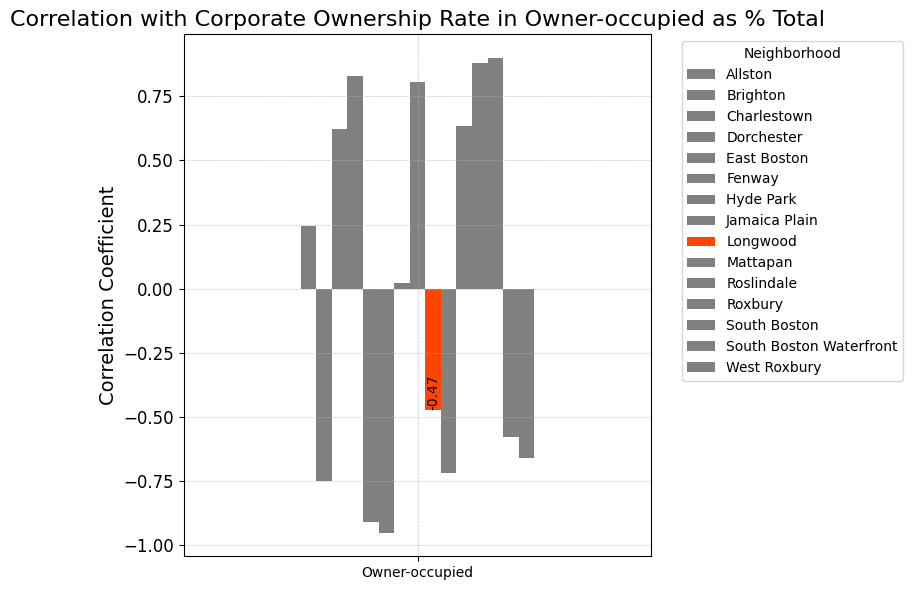

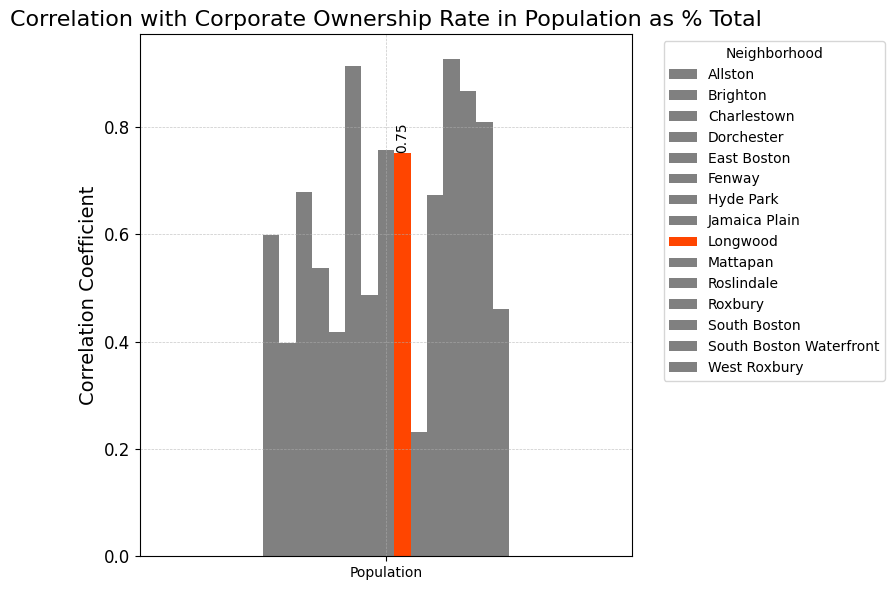

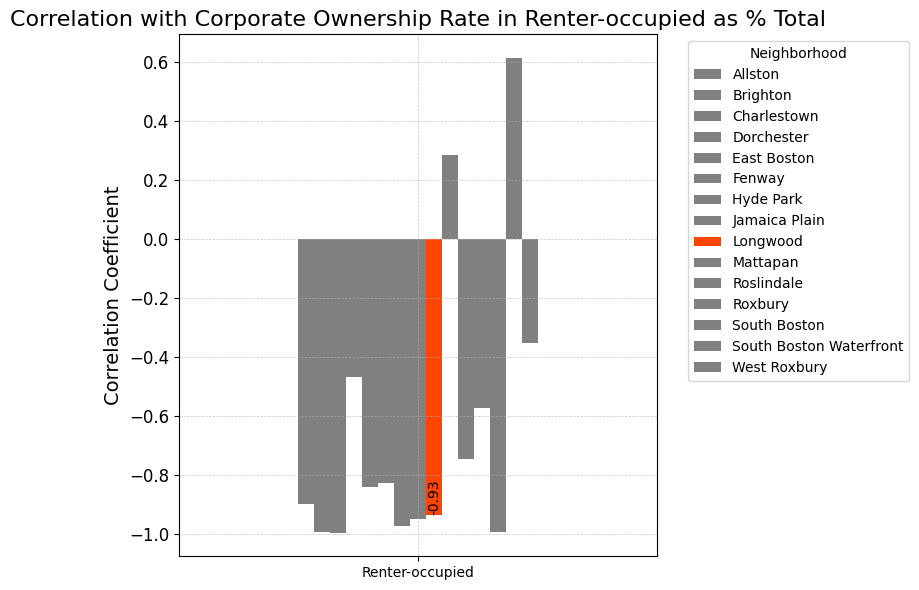

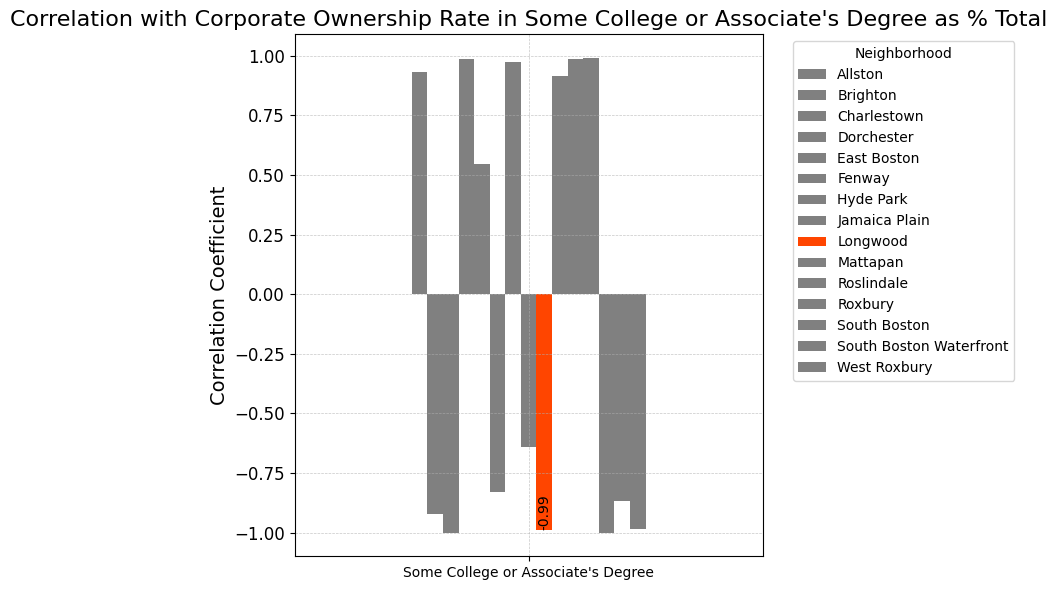

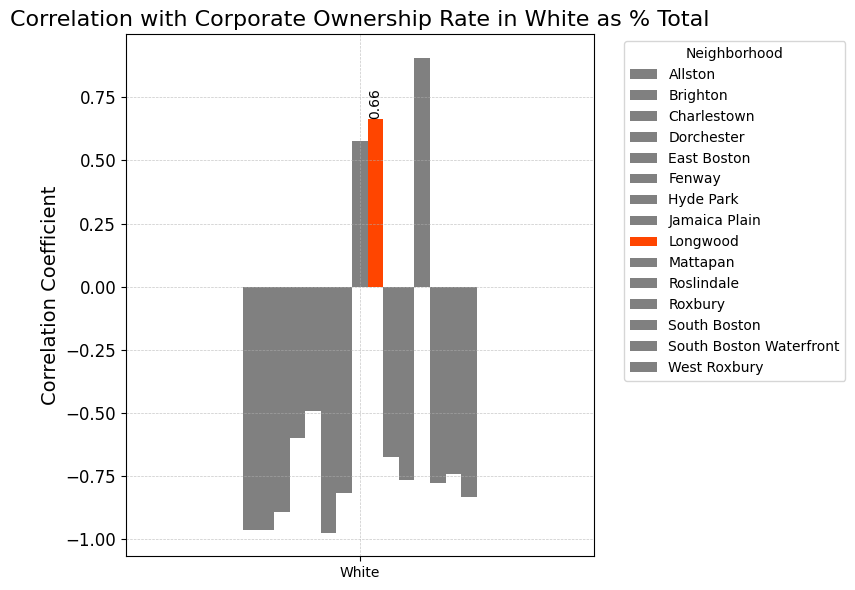

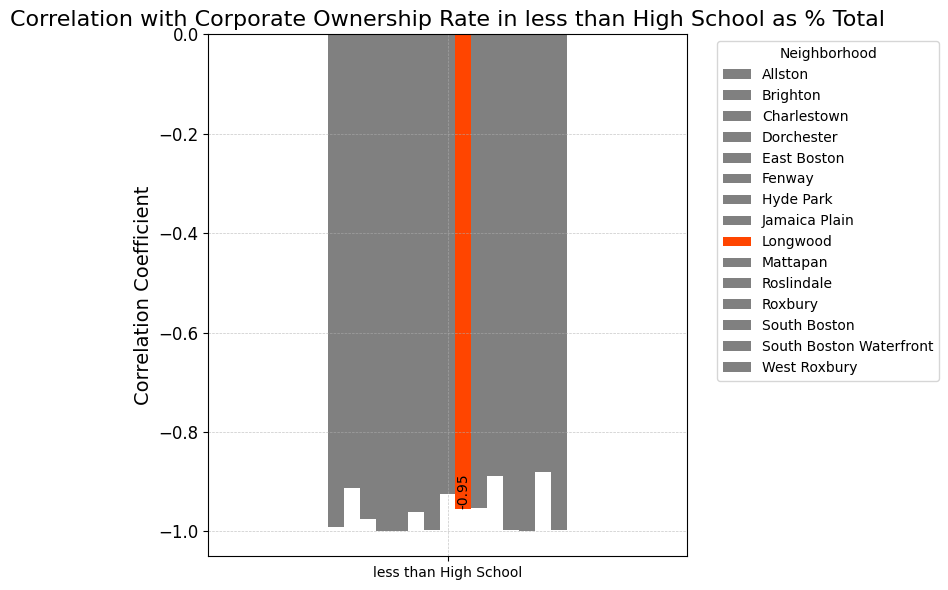

In [14]:
for feature, values in correlation_df.groupby(level=0):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
    values = values.unstack()
    
    colors = ['orangered' if x == 'Longwood' else 'grey' for x in values.columns.get_level_values('Neighborhood').tolist()]
    
    # Plotting the bars
    bars = values.plot(kind='bar', ax=ax, color=colors)
    
    # Customize the plot
    ax.set_title(f'Correlation with Corporate Ownership Rate in {feature} as % Total', fontsize=16)
    ax.set_ylabel('Correlation Coefficient', fontsize=14)
    ax.set_xlabel('')  # Remove the x-axis label
    ax.tick_params(axis='x', labelsize=10, rotation=0)  # Make x-axis labels horizontal
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Loop through the bars and add vertical labels for 'Jamaica Plain' and 'Longwood'
    for bar, label, value in zip(ax.patches, values.columns.get_level_values('Neighborhood').tolist(), values.iloc[0]):
        if label in ['Longwood']:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
                    ha='center', va='bottom', color='black', fontsize=10, rotation=90)  # Vertical text
    
    # Extracting the current handles and labels
    handles, labels = ax.get_legend_handles_labels()
    # Only taking the neighborhood name as the label (ignoring 'Correlation')
    new_labels = [label.split(', ')[1].strip(')') for label in labels]
    
    # Place the legend outside of the figure/plot with updated labels
    ax.legend(handles, new_labels, title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the padding to make room for the legend
    plt.show()

    # Save the figure as PNG with a specific DPI for consistent resolution
    feature_cleaned = feature.replace("/", "_")
    fig.savefig(f'Longwood_{feature_cleaned}.png', dpi=300, bbox_inches='tight')

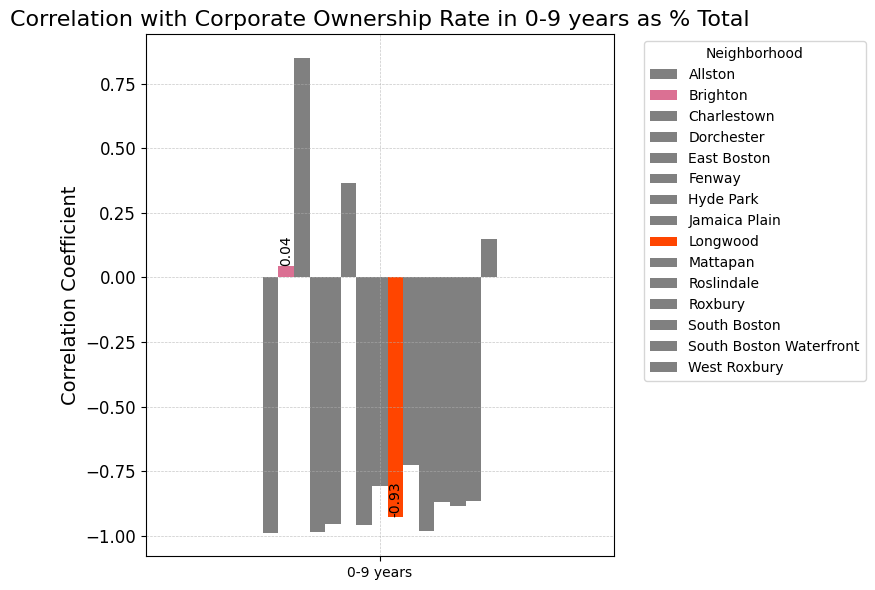

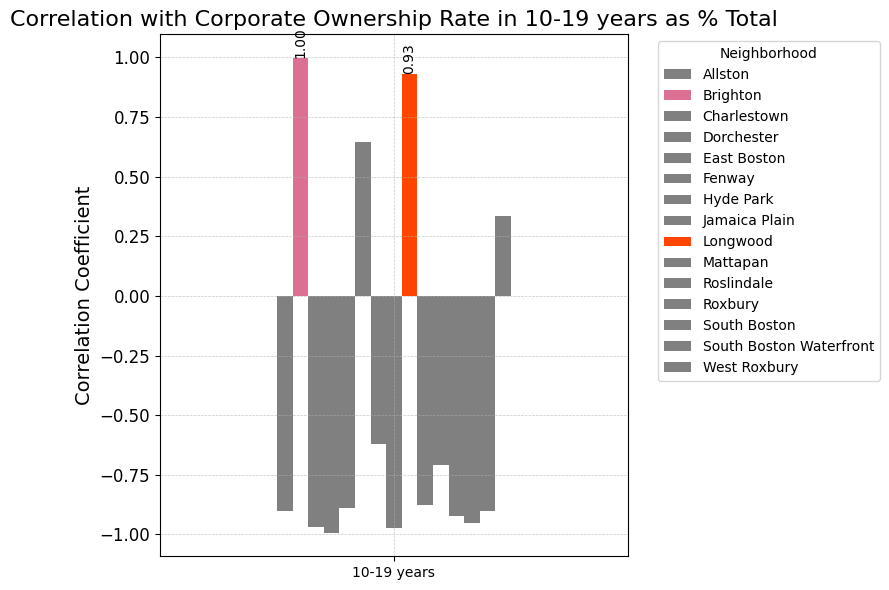

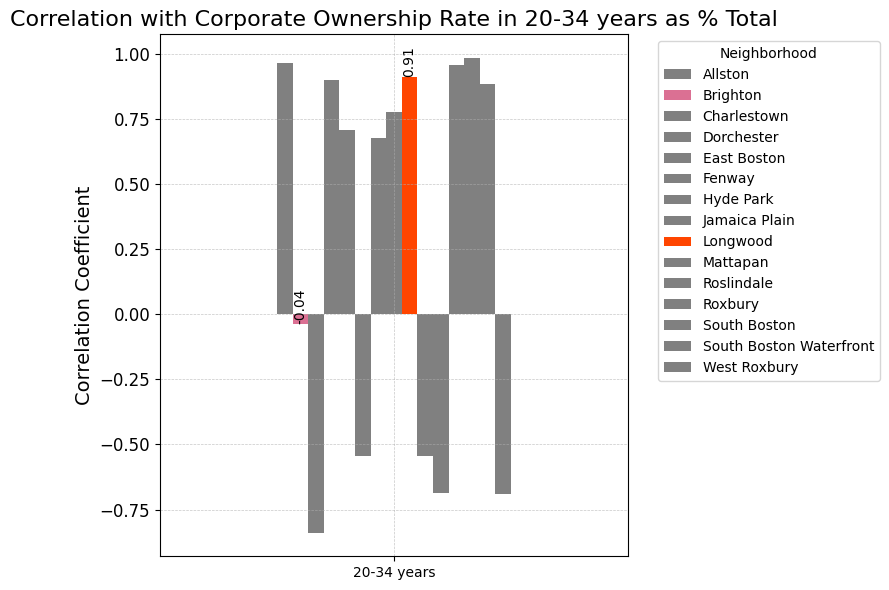

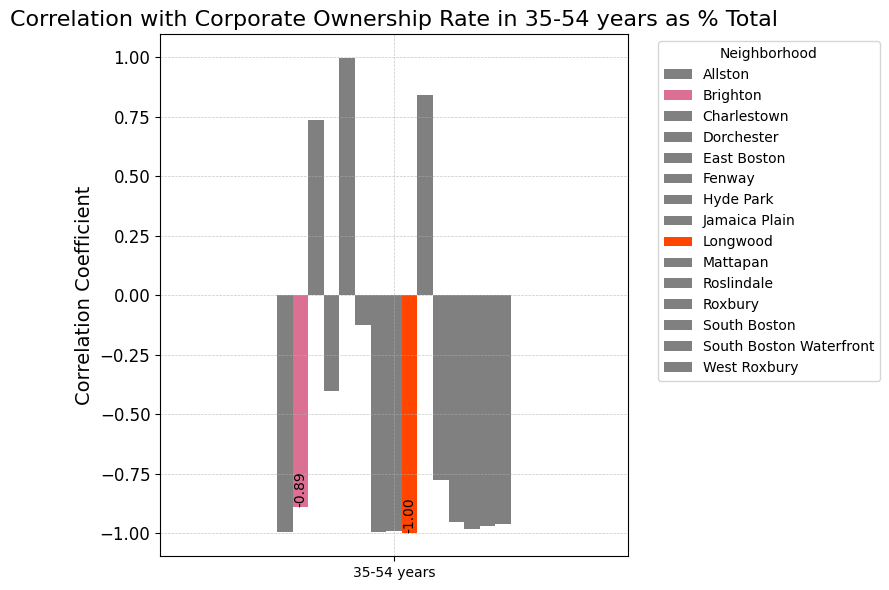

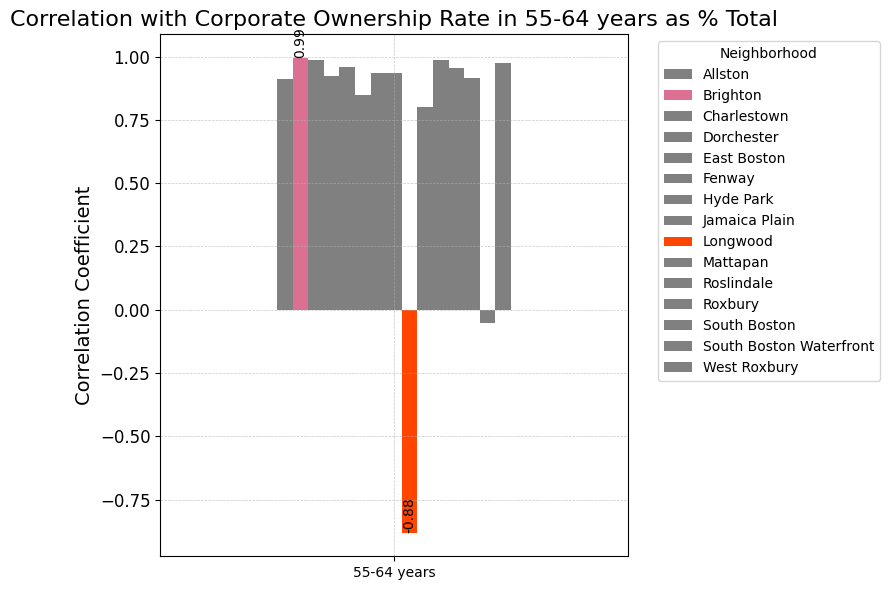

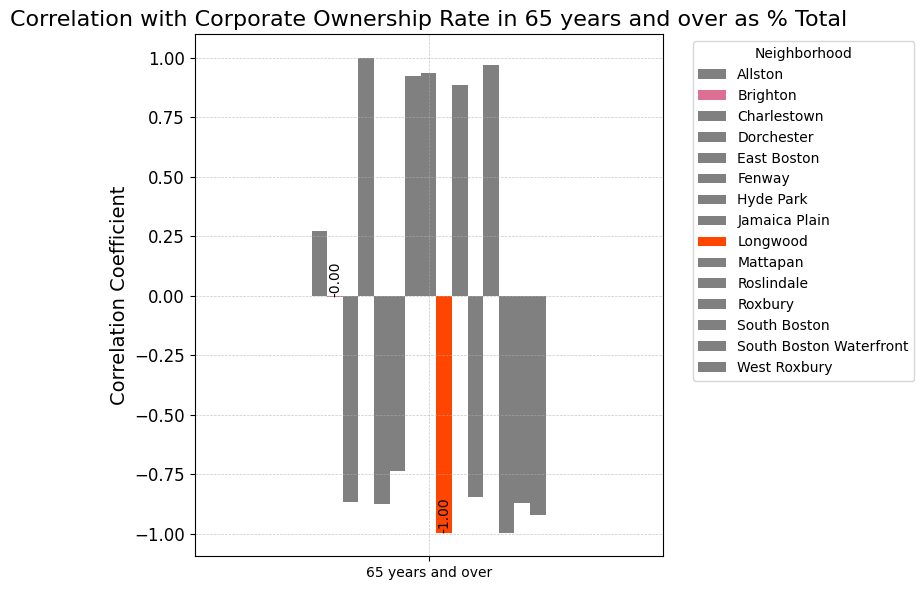

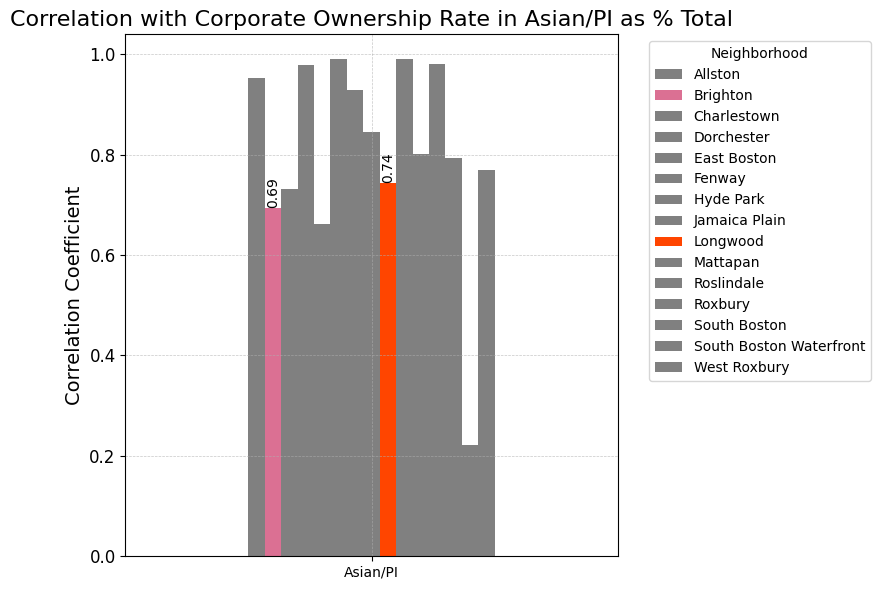

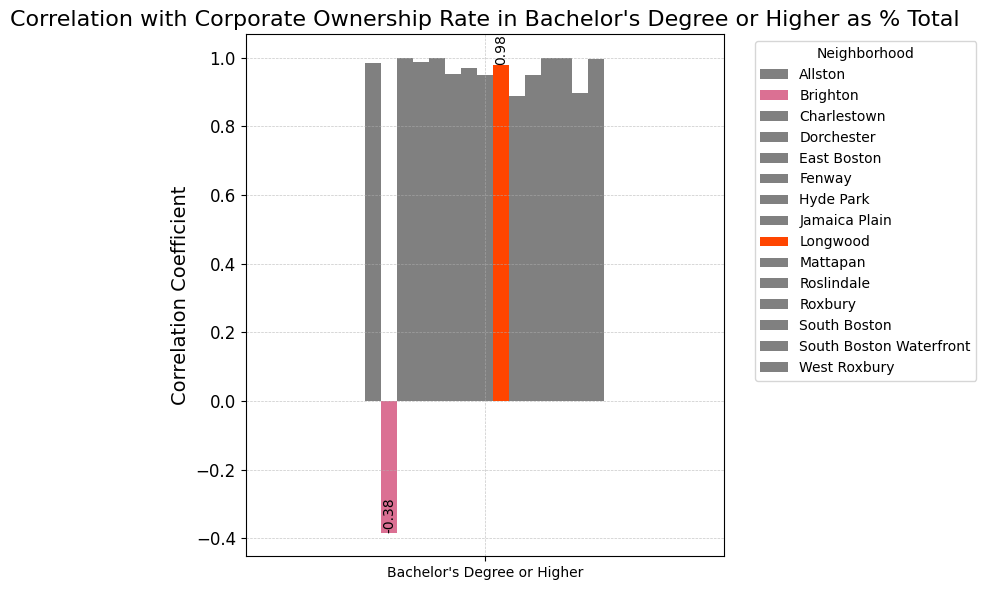

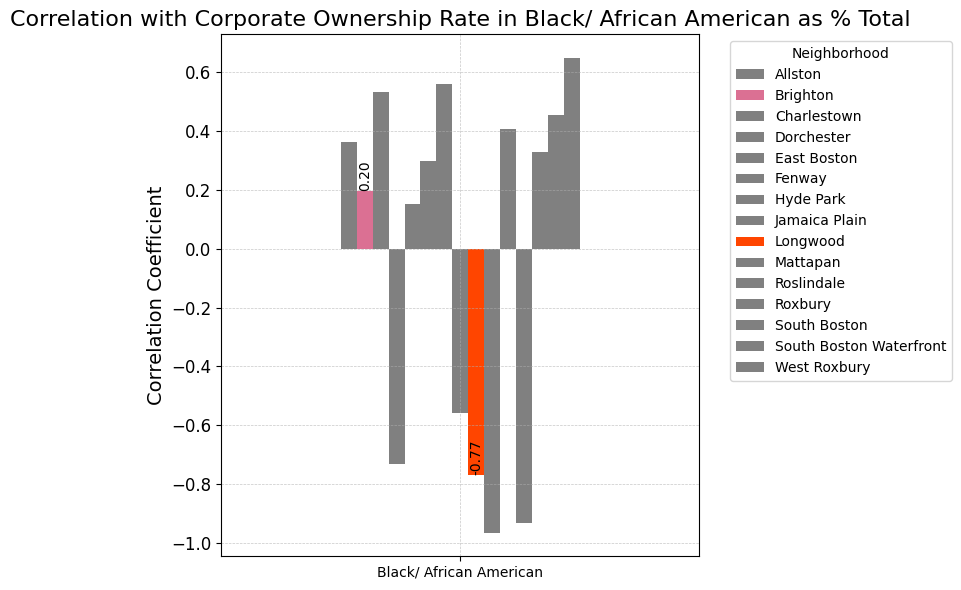

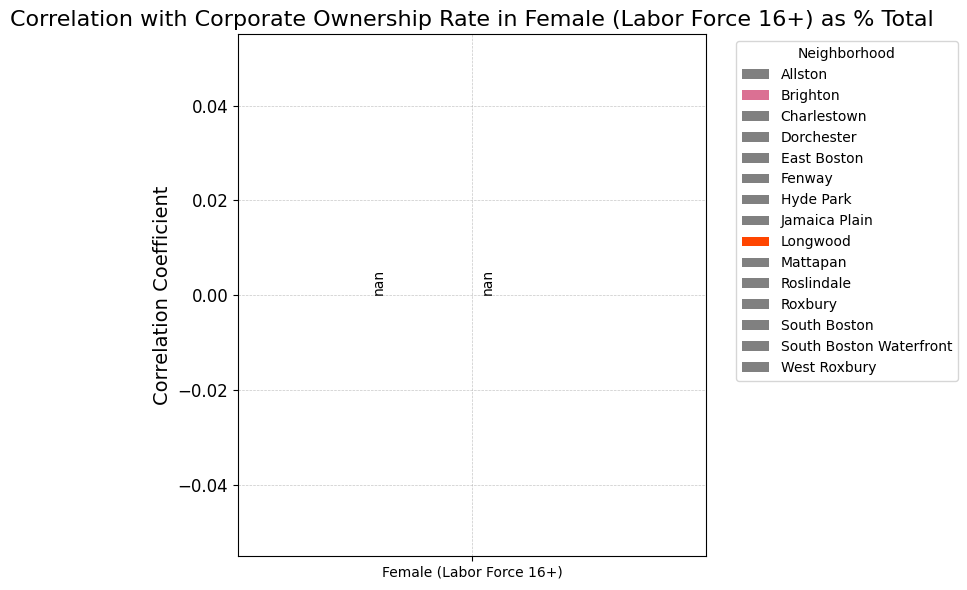

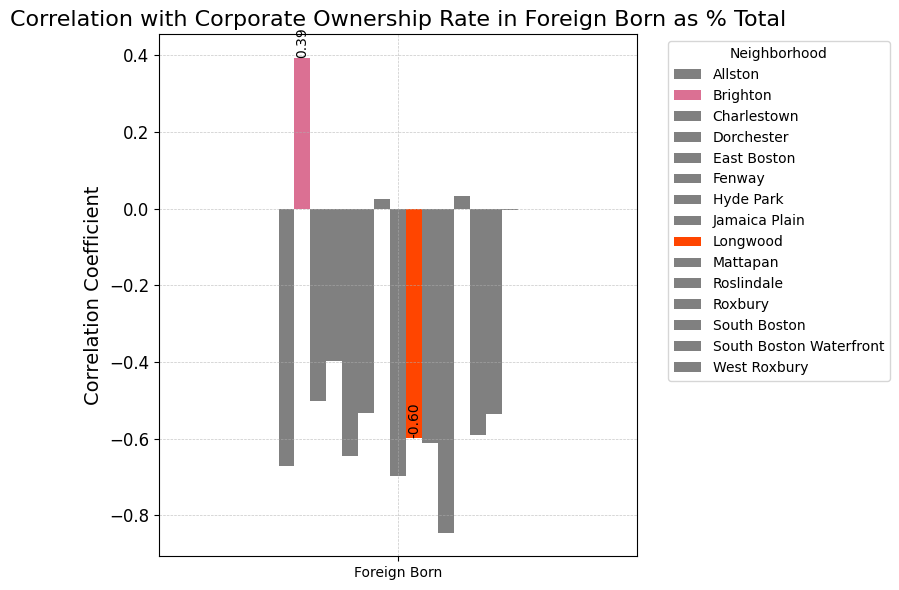

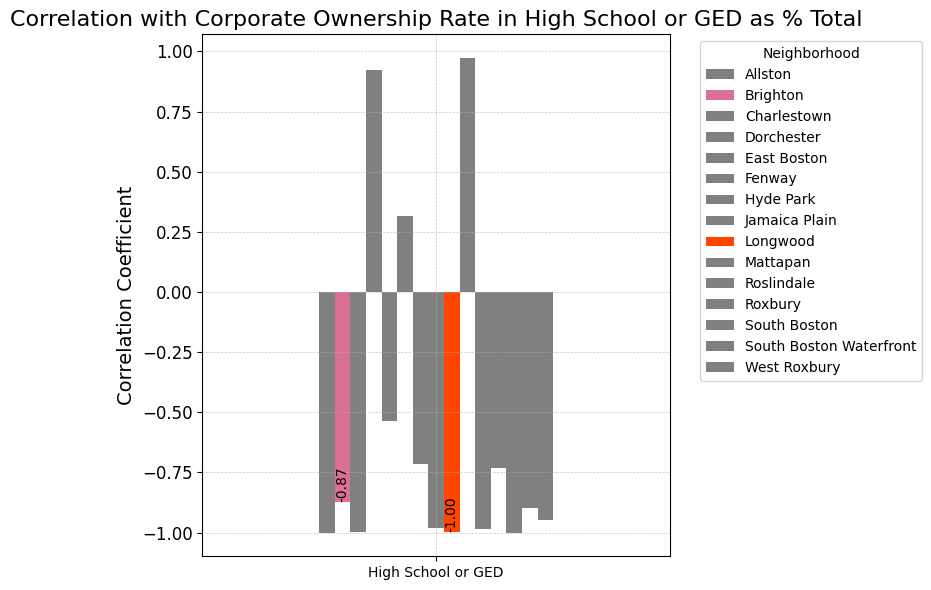

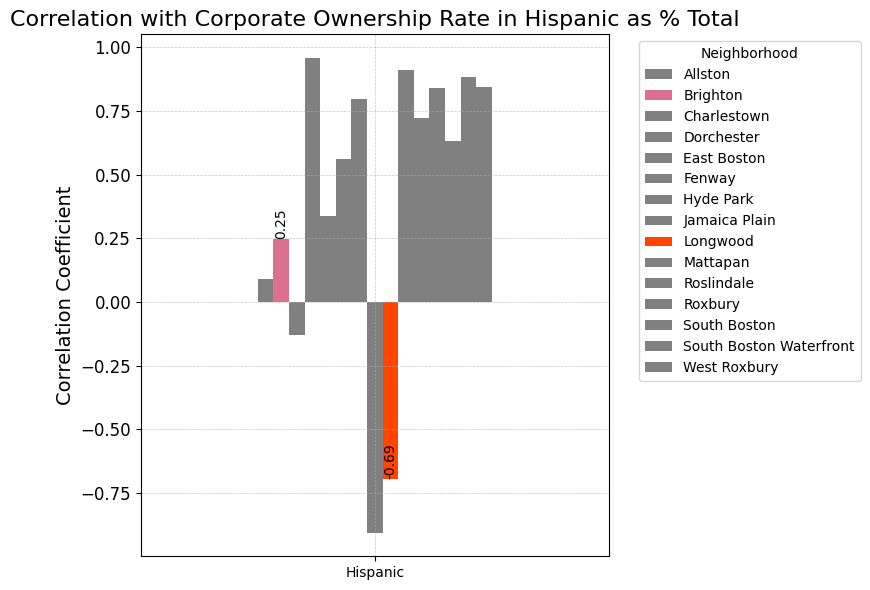

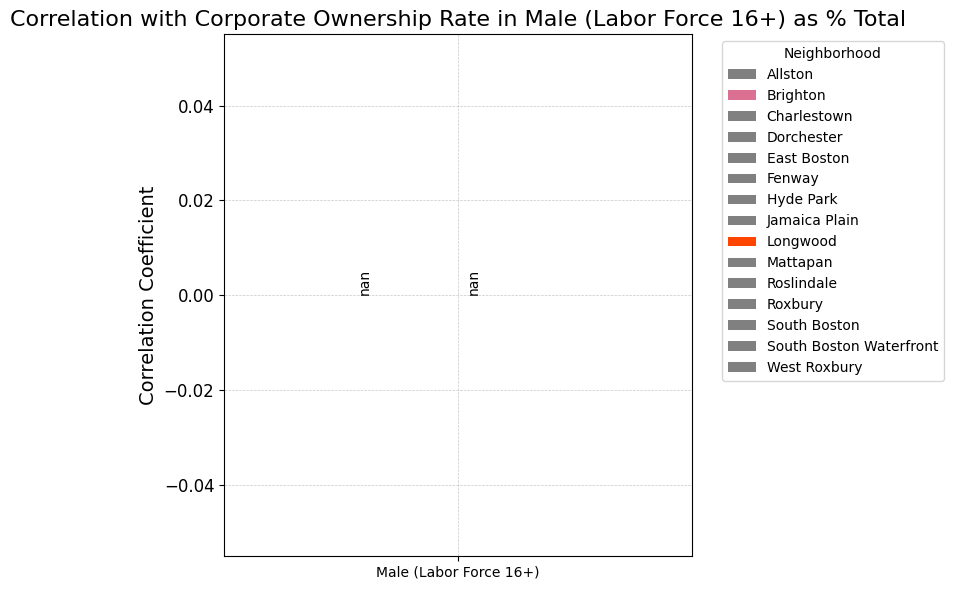

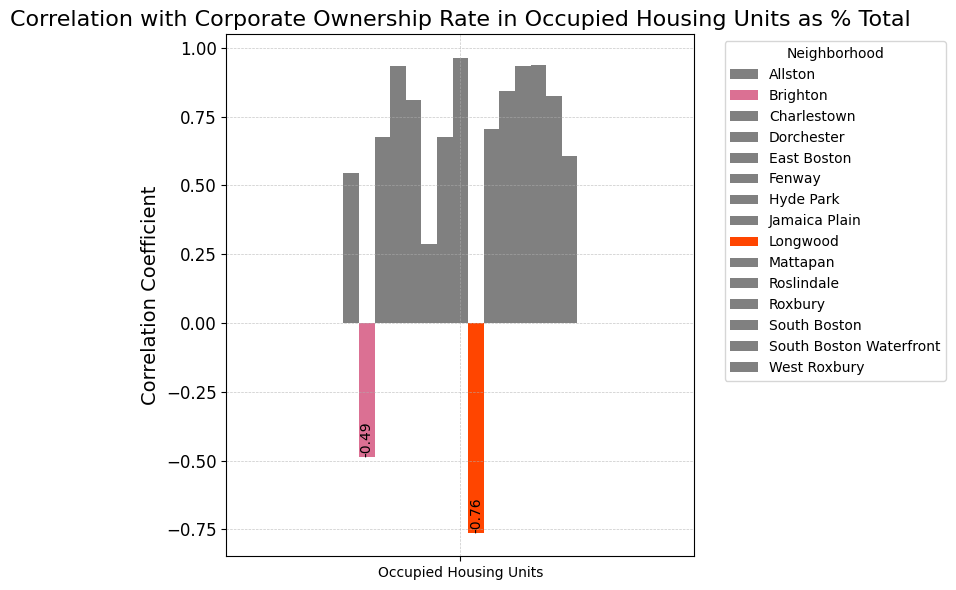

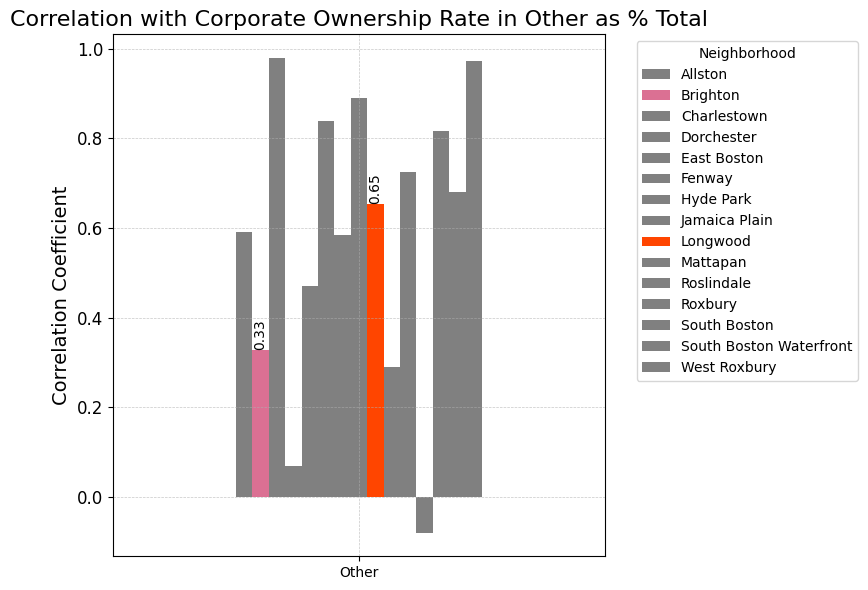

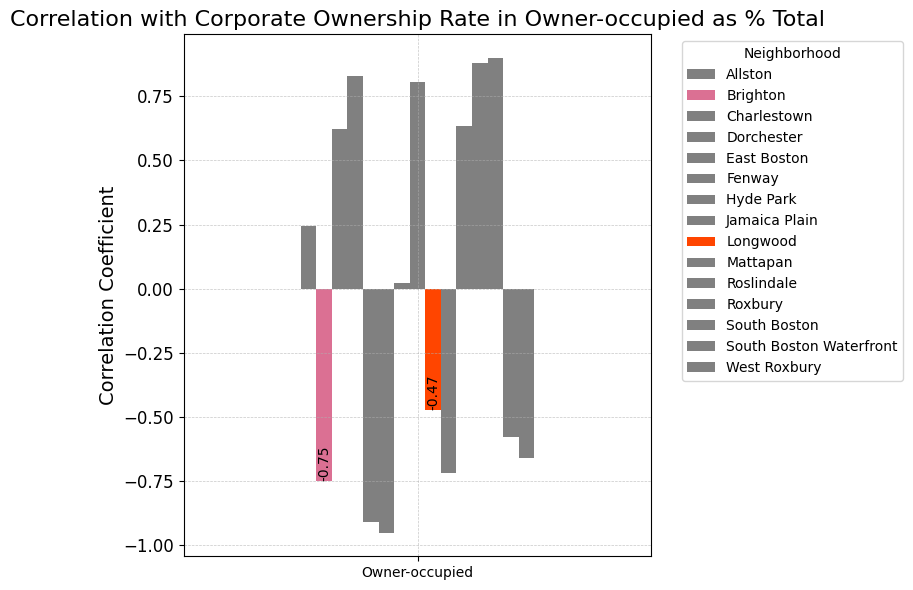

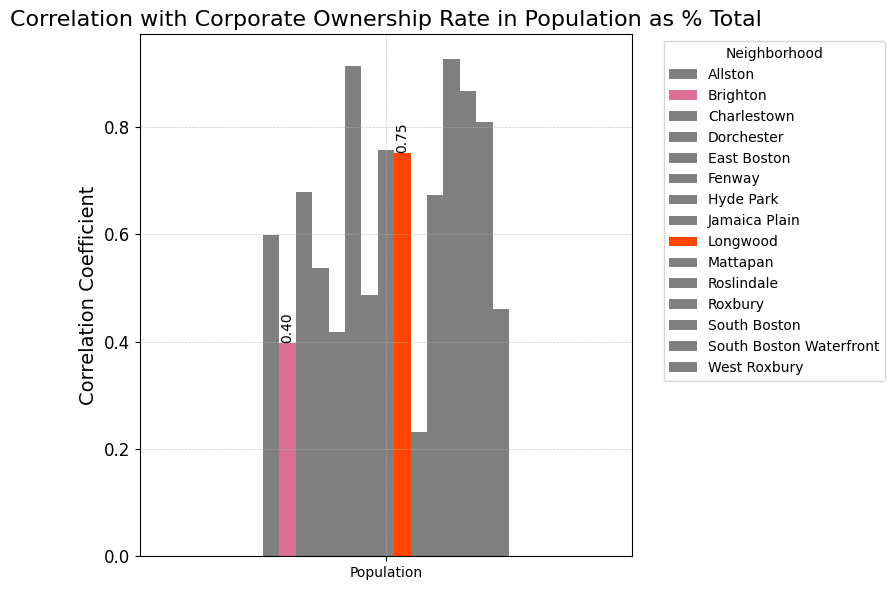

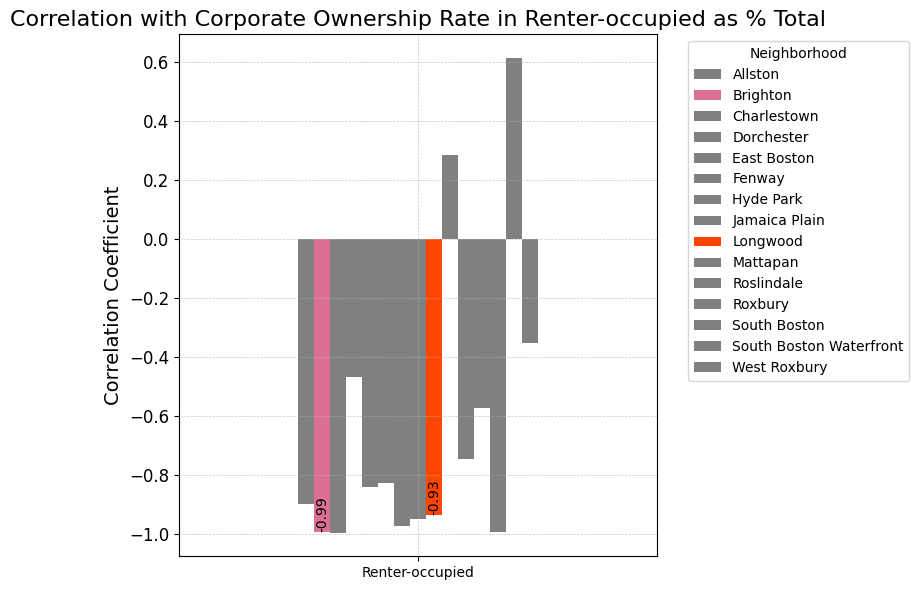

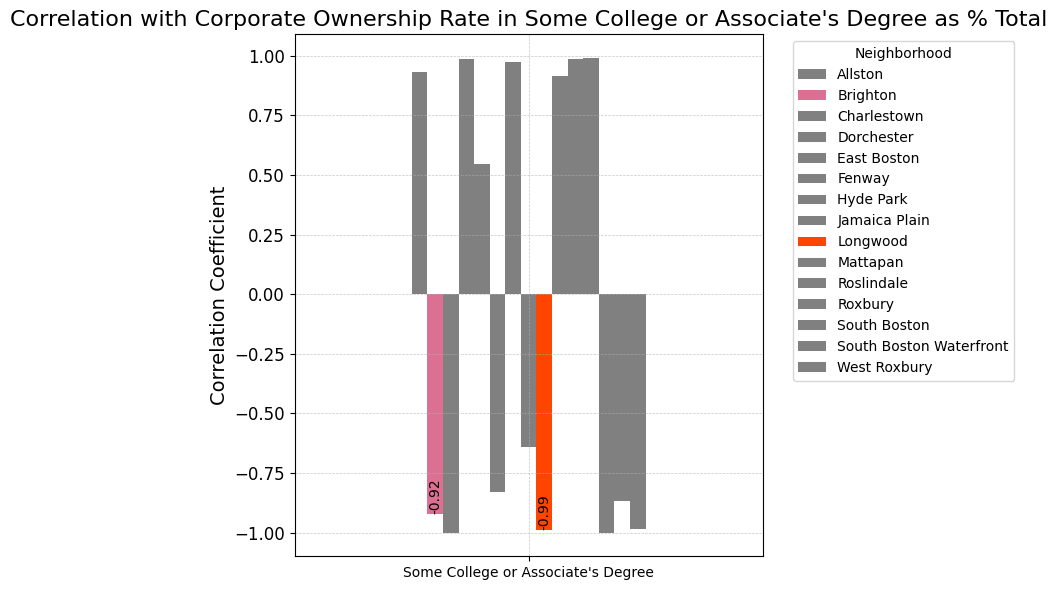

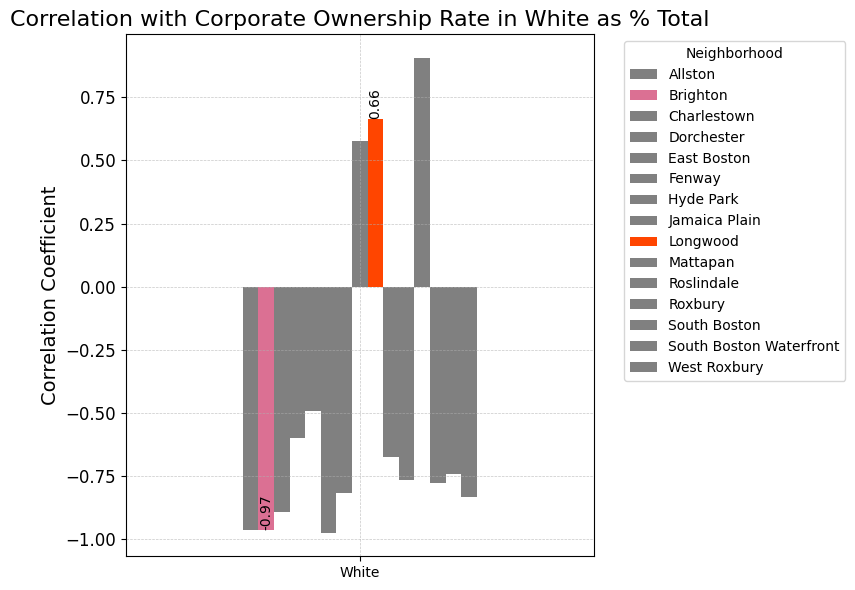

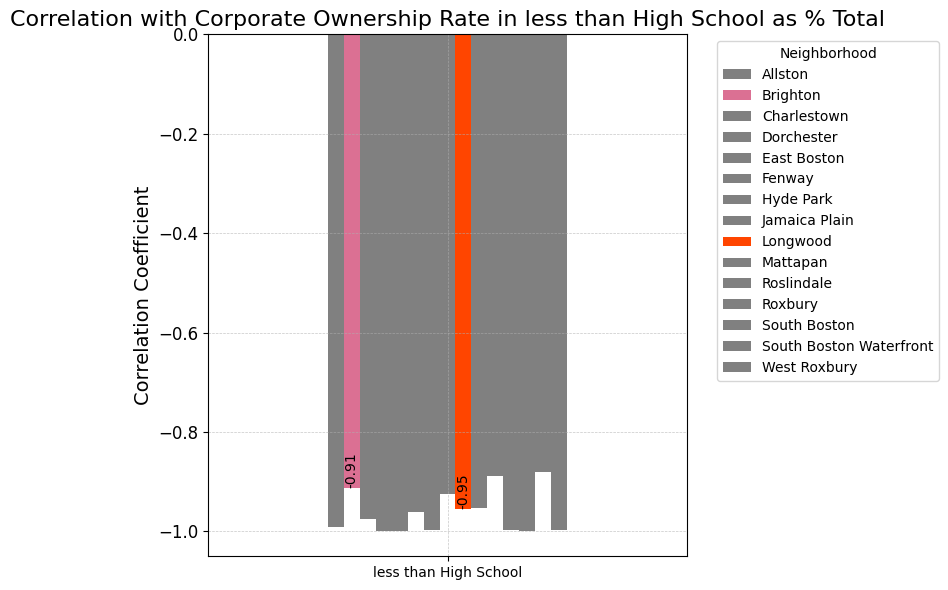

In [17]:
for feature, values in correlation_df.groupby(level=0):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
    values = values.unstack()
    
    colors = ['orangered' if x == 'Longwood' else 'palevioletred' if x == 'Brighton' else 'grey' for x in values.columns.get_level_values('Neighborhood').tolist()]
    
    # Plotting the bars
    bars = values.plot(kind='bar', ax=ax, color=colors)
    
    # Customize the plot
    ax.set_title(f'Correlation with Corporate Ownership Rate in {feature} as % Total', fontsize=16)
    ax.set_ylabel('Correlation Coefficient', fontsize=14)
    ax.set_xlabel('')  # Remove the x-axis label
    ax.tick_params(axis='x', labelsize=10, rotation=0)  # Make x-axis labels horizontal
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Loop through the bars and add vertical labels for 'Jamaica Plain' and 'Longwood'
    for bar, label, value in zip(ax.patches, values.columns.get_level_values('Neighborhood').tolist(), values.iloc[0]):
        if label in ['Longwood', 'Brighton']:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
                    ha='center', va='bottom', color='black', fontsize=10, rotation=90)  # Vertical text
    
    # Extracting the current handles and labels
    handles, labels = ax.get_legend_handles_labels()
    # Only taking the neighborhood name as the label (ignoring 'Correlation')
    new_labels = [label.split(', ')[1].strip(')') for label in labels]
    
    # Place the legend outside of the figure/plot with updated labels
    ax.legend(handles, new_labels, title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the padding to make room for the legend
    plt.show()

    # Save the figure as PNG with a specific DPI for consistent resolution
    feature_cleaned = feature.replace("/", "_")
    fig.savefig(f'Brighton_Longwood_{feature_cleaned}.png', dpi=300, bbox_inches='tight')